In [ ]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
import unicodedata
import re
nltk.download('all')

# **Visualisations based on BERT**

In [2]:
data_path = "/content/drive/MyDrive/Covid 19 India/bert_final.csv"
bert_data = pd.read_csv(data_path)
bert_data = bert_data.dropna()
bert_data = bert_data.reset_index().drop(['index'], axis = 1)
bert_data

,Tweet,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Surprise,Joking,month,place
0,meditation and mindfulness tips for coping wit...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mar,"pune, india"
1,contribute to india fights corona gandhinagar...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mar,"gandhinagar, india"
2,"sir, please send a team immediately to sa...",1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,mar,"bidhan nagar, india"
3,#ssc_ufm_mat_karona#corona is slow poison #ufm...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,mar,"maharashtra, india"
4,mata di doston ise #corona ke tarah faila do ...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mar,"bokaro steel city, india"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145550,wow good to see these kids interest in onli...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sep,lb nagar
145551,"83,812 new cases and 1054 deaths in last 24 ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,sep,"new delhi, india"
145552,unlocking the #lockdown - women’s rights &amp;...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sep,"new delhi, india"
145553,astrazeneca covid-19 vaccine trial in us on ho...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,sep,"new delhi, india"


In [3]:
bert_data['n_emotions'] = bert_data['Optimistic'] + bert_data['Thankful'] + bert_data['Empathetic'] + bert_data['Pessimistic'] + bert_data['Anxious'] + bert_data['Sad'] + \
                          bert_data['Annoyed'] + bert_data['Denial'] + bert_data['Official report'] + bert_data['Surprise'] + bert_data['Joking']
bert_data['n_emotions'] = bert_data['n_emotions'].astype(int)

In [4]:
bert_data['n_emotions'].value_counts()

2    66786
1    61214
3    14981
0     1306
4     1225
5       43
Name: n_emotions, dtype: int64

In [5]:
maha_bert = bert_data[(bert_data['place'] == "mumbai, india") | (bert_data['place'] == 'mumbai') | (bert_data['place'] == 'navi mumbai') | (bert_data['place'] == 'navi mumbai, india') |
            (bert_data['place'] == 'pune') | (bert_data['place'] == 'pune, india') | (bert_data['place'] == 'nagpur') | (bert_data['place'] == 'nagpur, india')]
delhi_bert = bert_data[(bert_data['place'] == "delhi, india") | (bert_data['place'] == "new delhi, india") | (bert_data['place'] == "delhi") | (bert_data['place'] == 'new delhi')]

print(maha_bert.shape, delhi_bert.shape)

(20387, 15) (17593, 15)


**Label distribution**

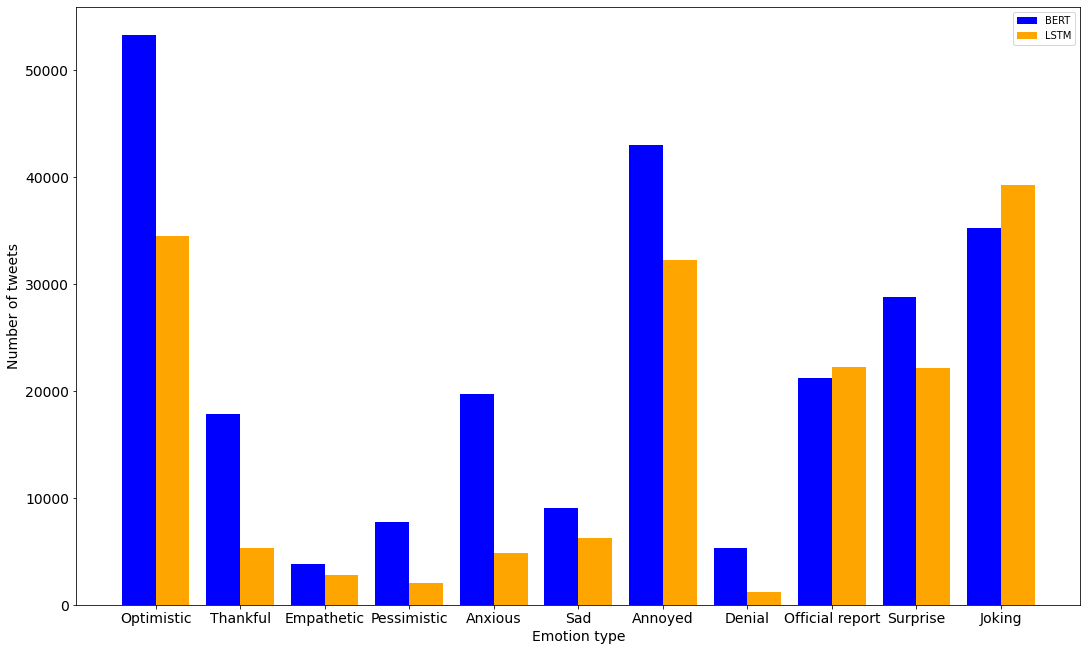

In [14]:
#creating plot
bert_sent_values = bert_data.iloc[:, 1:12].sum().values.astype(int)
lstm_sent_values = lstm_data.iloc[:, 4:].sum().values.astype(int)
emotions = list(bert_data.columns[1:12])

x = np.arange(11)
y1 = bert_sent_values
y2 = lstm_sent_values
width = 0.4

plt.figure(figsize = (18, 11))
plt.bar(x-0.2, y1, width, color = 'blue')
plt.bar(x+0.2, y2, width, color = 'orange')
plt.xticks(x, emotions, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Emotion type", fontsize = 14)
plt.ylabel("Number of tweets", fontsize = 14)
plt.legend(["BERT", "LSTM"])
plt.show()

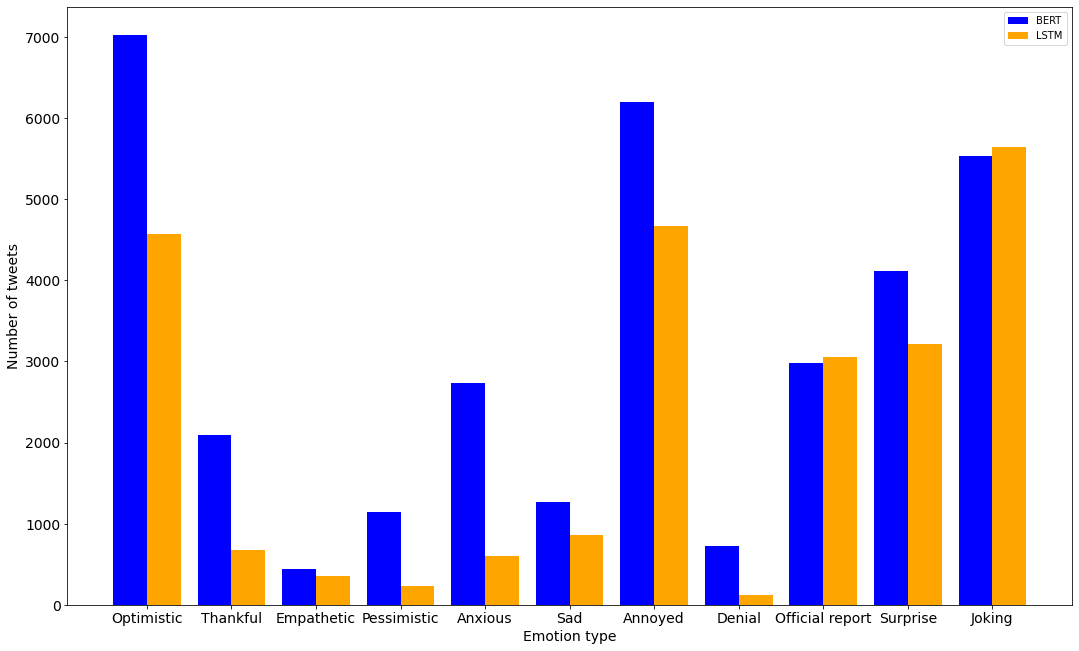

In [15]:
#creating plot
maha_bert_sent_values = maha_bert.iloc[:, 1:12].sum().values.astype(int)
maha_lstm_sent_values = maha_lstm.iloc[:, 4:].sum().values.astype(int)
emotions = list(maha_bert.columns[1:12])

x = np.arange(11)
y1 = maha_bert_sent_values
y2 = maha_lstm_sent_values
width = 0.4

plt.figure(figsize = (18, 11))
plt.bar(x-0.2, y1, width, color = 'blue')
plt.bar(x+0.2, y2, width, color = 'orange')
plt.xticks(x, emotions, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Emotion type", fontsize = 14)
plt.ylabel("Number of tweets", fontsize = 14)
plt.legend(["BERT", "LSTM"])
plt.show()

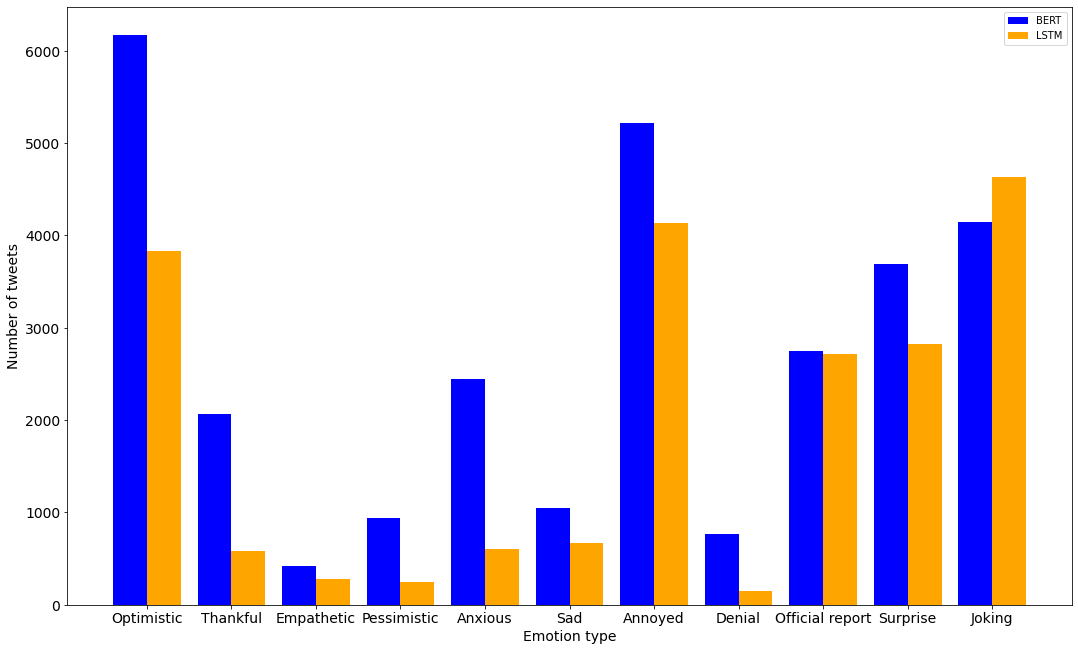

In [16]:
#creating plot
delhi_bert_sent_values = delhi_bert.iloc[:, 1:12].sum().values.astype(int)
delhi_lstm_sent_values = delhi_lstm.iloc[:, 4:].sum().values.astype(int)
emotions = list(delhi_bert.columns[1:12])

x = np.arange(11)
y1 = delhi_bert_sent_values
y2 = delhi_lstm_sent_values
width = 0.4

plt.figure(figsize = (18, 11))
plt.bar(x-0.2, y1, width, color = 'blue')
plt.bar(x+0.2, y2, width, color = 'orange')
plt.xticks(x, emotions, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Emotion type", fontsize = 14)
plt.ylabel("Number of tweets", fontsize = 14)
plt.legend(["BERT", "LSTM"])
plt.show()

**Single model label distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


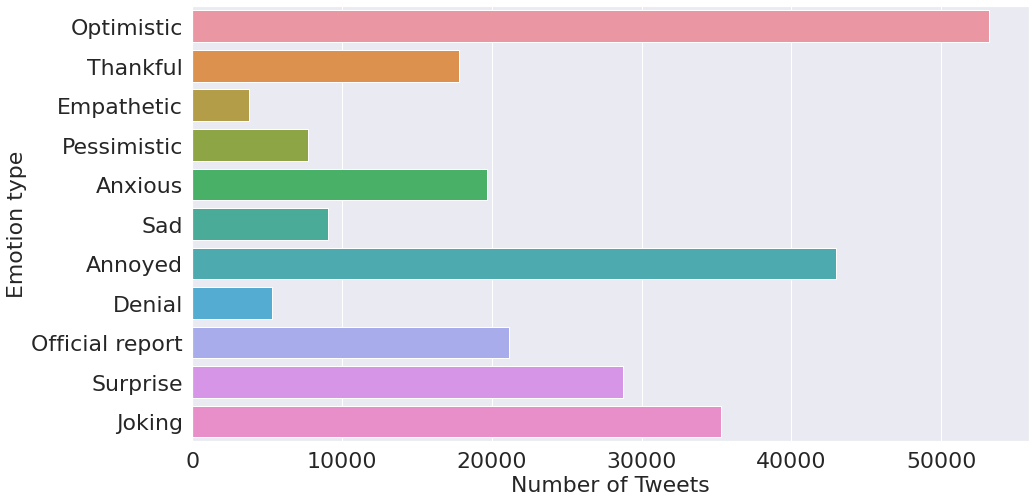

In [ ]:
categories = list(data.columns[1:12].values)
sns.set(font_scale = 2)

plt.figure(figsize = (15, 8))
ax= sns.barplot(data.iloc[:, 1:12].sum().values, categories, orient = 'h')
#plt.title("Distribution of Emotions", fontsize = 24)
plt.xlabel('Number of Tweets', fontsize = 22)
plt.ylabel('Emotion type', fontsize = 22)

#adding the text labels
rects = ax.patches
labels = data.iloc[:, 4:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = 'center', va = 'bottom', fontsize = 18)
plt.show()

In [ ]:
bert_data.iloc[:, 1:12].sum().astype(int)

Optimistic         53247
Thankful           17824
Empathetic          3792
Pessimistic         7720
Anxious            19708
Sad                 9070
Annoyed            42945
Denial              5294
Official report    21166
Surprise           28806
Joking             35272
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


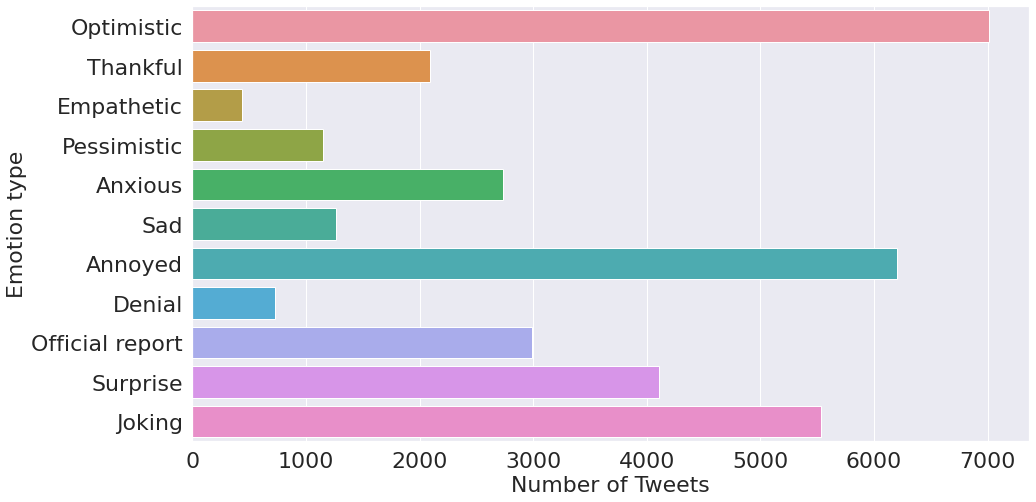

In [ ]:
#emotion distri in maha
maha_categories = list(maha.columns[1:12].values)
sns.set(font_scale = 2)

plt.figure(figsize = (15, 8))
ax= sns.barplot(maha.iloc[:, 1:12].sum().values, categories, orient = 'h')
#plt.title("Distribution of Emotions", fontsize = 24)
plt.xlabel('Number of Tweets', fontsize = 22)
plt.ylabel('Emotion type', fontsize = 22)

#adding the text labels
rects = ax.patches
labels = data.iloc[:, 4:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = 'center', va = 'bottom', fontsize = 18)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


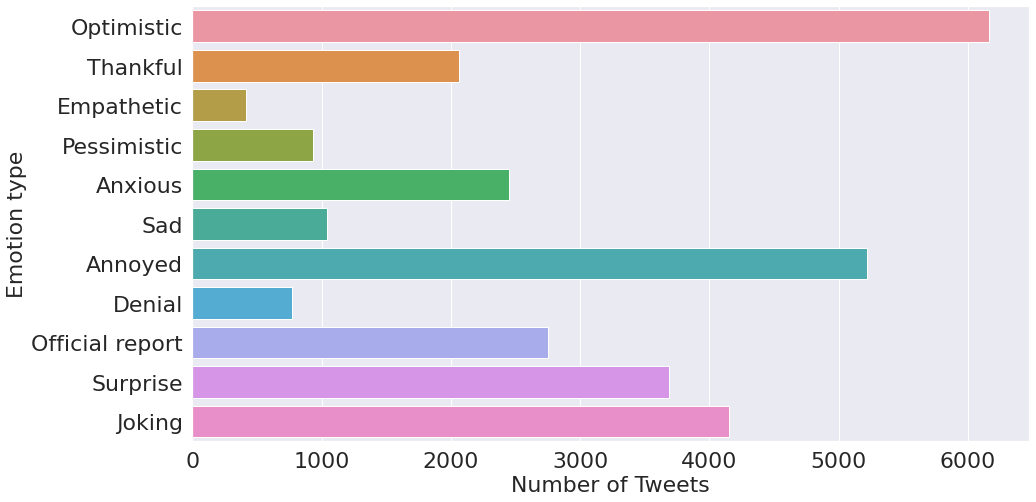

In [ ]:
#emotion distri in delhi
del_categories = list(delhi.columns[1:12].values)
sns.set(font_scale = 2)

plt.figure(figsize = (15, 8))
ax= sns.barplot(delhi.iloc[:, 1:12].sum().values, categories, orient = 'h')
#plt.title("Distribution of Emotions", fontsize = 24)
plt.xlabel('Number of Tweets', fontsize = 22)
plt.ylabel('Emotion type', fontsize = 22)

#adding the text labels
rects = ax.patches
labels = data.iloc[:, 4:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = 'center', va = 'bottom', fontsize = 18)
plt.show()

**heatmaps**

In [ ]:
emotions = list(data.columns[1:12])
only_emotes = data[emotions]
only_emotes

,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Surprise,Joking
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
145507,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145509,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
emote_array = np.zeros((11, 11))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Denial' : 7, 'Official report' : 8,
    'Surprise' : 9, 'Joking' : 10
}
for i in range(len(only_emotes)):
    l = only_emotes.iloc[i].tolist()
    for j in range(11):
        if l[j] == 1:
            emote_array[j][j] += 1
        for k in range(j+1, 11):
            if (l[j] == 1) and (l[k] == 1):
                emote_array[j][k] += int(1)
                emote_array[k][j] += int(1)

emote_df = pd.DataFrame(emote_array, columns = emotions)
for col in emote_df:
    emote_df[col] = emote_df[col].astype(int)

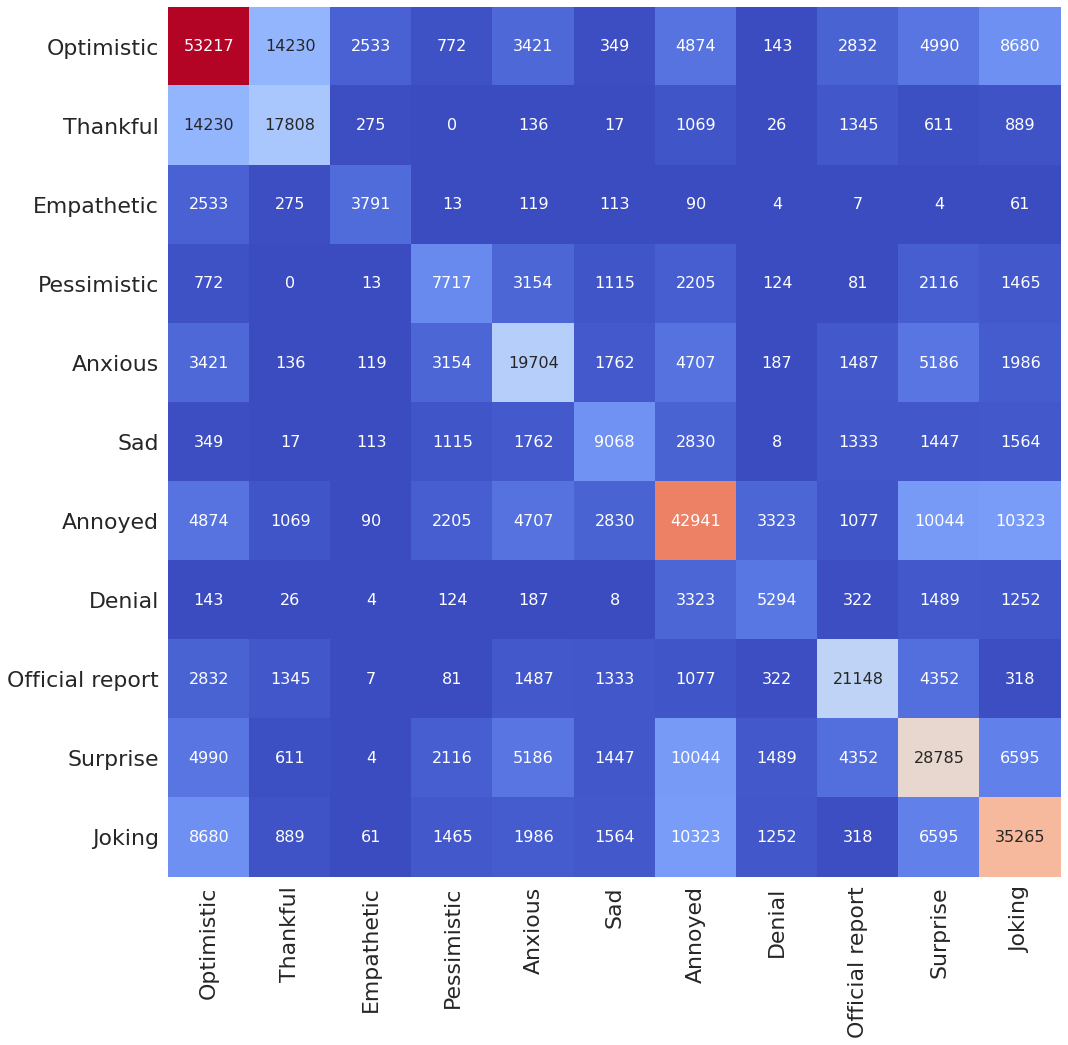

In [ ]:
fig = plt.figure(figsize = (16, 16))
sns.set(font_scale = 2)
sns.heatmap(emote_df, annot = True, cmap = 'coolwarm', xticklabels = emote_df.columns, yticklabels = emote_df.columns, 
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

In [ ]:
maha_emotions = list(maha.columns[1:12])
only_emotes = maha[emotions]

emote_array = np.zeros((11, 11))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Denial' : 7, 'Official report' : 8,
    'Surprise' : 9, 'Joking' : 10
}
for i in range(len(only_emotes)):
    l = only_emotes.iloc[i].tolist()
    for j in range(11):
        if l[j] == 1:
            emote_array[j][j] += 1
        for k in range(j+1, 11):
            if (l[j] == 1) and (l[k] == 1):
                emote_array[j][k] += int(1)
                emote_array[k][j] += int(1)

emote_df = pd.DataFrame(emote_array, columns = emotions)
for col in emote_df:
    emote_df[col] = emote_df[col].astype(int)

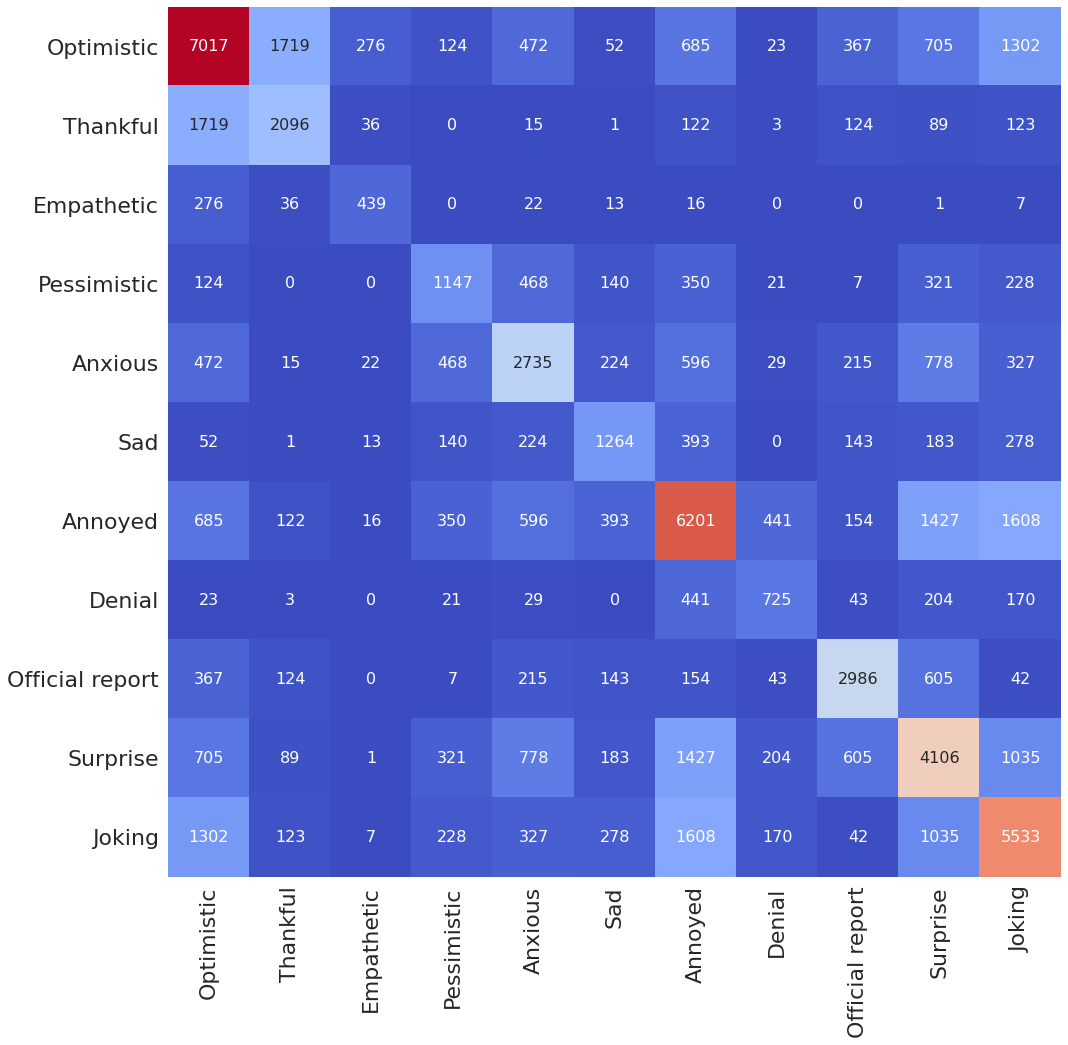

In [ ]:
fig = plt.figure(figsize = (16, 16))
sns.set(font_scale = 2)
sns.heatmap(emote_df, annot = True, cmap = 'coolwarm', xticklabels = emote_df.columns, yticklabels = emote_df.columns, 
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

In [ ]:
del_emotions = list(delhi.columns[1:12])
only_emotes = delhi[emotions]

emote_array = np.zeros((11, 11))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Denial' : 7, 'Official report' : 8,
    'Surprise' : 9, 'Joking' : 10
}
for i in range(len(only_emotes)):
    l = only_emotes.iloc[i].tolist()
    for j in range(11):
        if l[j] == 1:
            emote_array[j][j] += 1
        for k in range(j+1, 11):
            if (l[j] == 1) and (l[k] == 1):
                emote_array[j][k] += int(1)
                emote_array[k][j] += int(1)

emote_df = pd.DataFrame(emote_array, columns = emotions)
for col in emote_df:
    emote_df[col] = emote_df[col].astype(int)

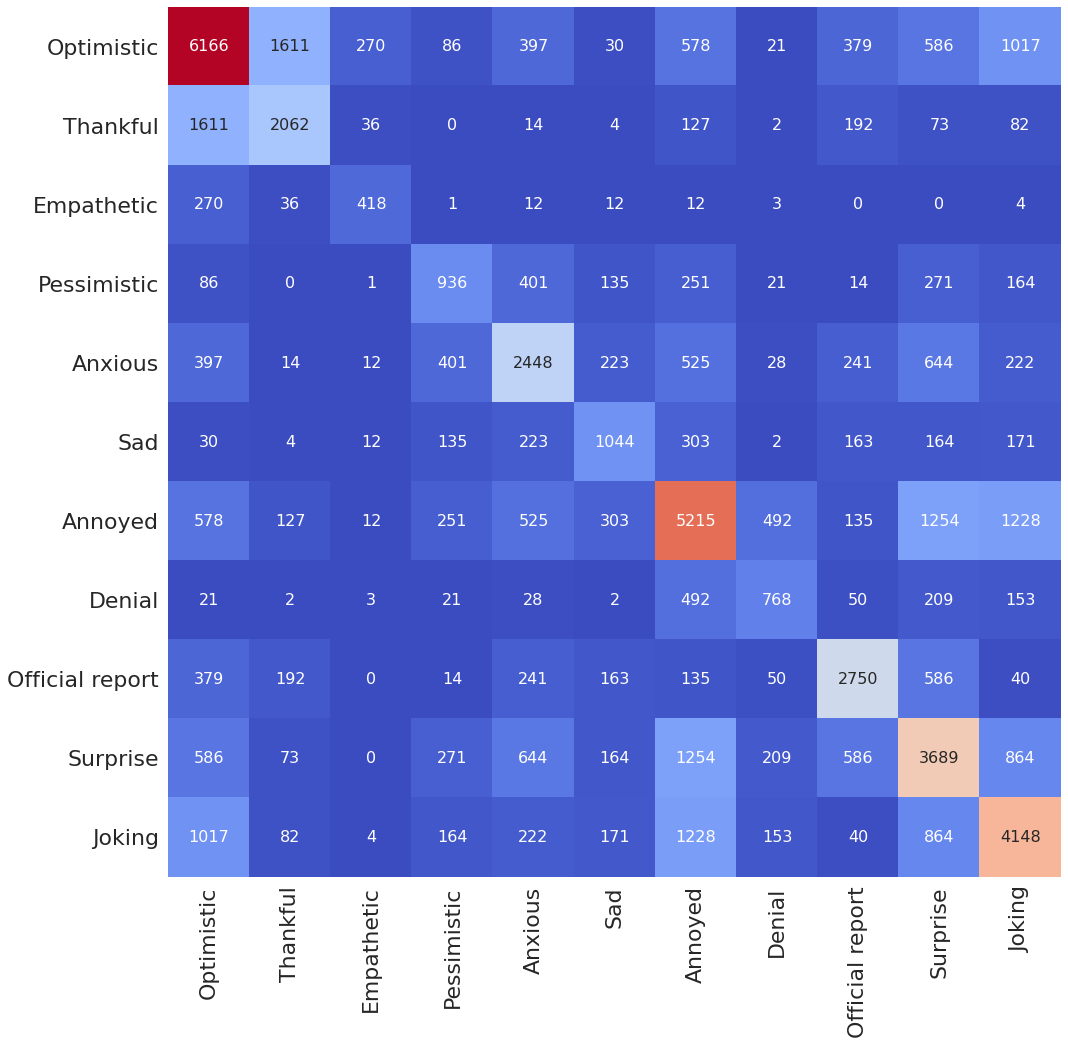

In [ ]:
fig = plt.figure(figsize = (16, 16))
sns.set(font_scale = 2)
sns.heatmap(emote_df, annot = True, cmap = 'coolwarm', xticklabels = emote_df.columns, yticklabels = emote_df.columns, 
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


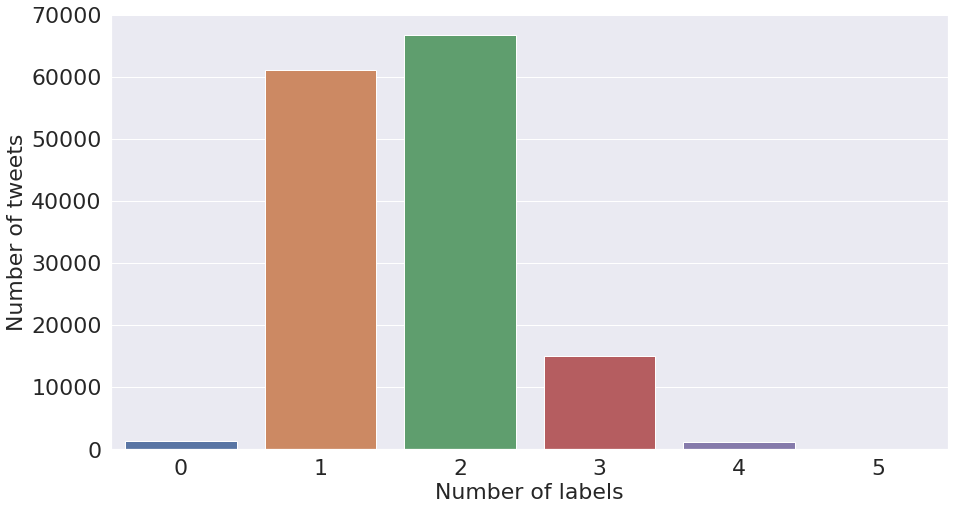

In [ ]:
rowSums = data['n_emotions'].astype(int)
multiLabel_counts = rowSums.value_counts()

sns.set(font_scale = 2)
plt.figure(figsize = (15, 8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values, orient = 'v')

#plt.title("Tweets having multiple labels")
plt.ylabel('Number of tweets', fontsize = 22)
plt.xlabel('Number of labels', fontsize = 22)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

**monthwise visualisation of emotions**

In [ ]:
def get_lists(data):
    emotions = data.columns[1:12]
    months = ["March", "April", "May", "June", "July", "August", "September"]
    march = [data[data['month'] == 'mar'][x].sum() for x in emotions]
    april = [data[data['month'] == 'apr'][x].sum() for x in emotions]
    may = [data[data['month'] == 'may'][x].sum() for x in emotions]
    june = [data[data['month'] == 'jun'][x].sum() for x in emotions]
    july = [data[data['month'] == 'jul'][x].sum() for x in emotions]
    august = [data[data['month'] == 'aug'][x].sum() for x in emotions]
    september = [data[data['month'] == 'sep'][x].sum() for x in emotions]

    return march, april, may, june, july, august, september

def monthwise(march, april, may, june, july, august, september):

    df = pd.DataFrame({'Mar' : {'Optimistic' : march[0],
                                'Thankful' : march[1],
                                'Empathetic' : march[2],
                                'Pessimistic' : march[3],
                                'Anxious' : march[4],
                                'Sad' : march[5],
                                'Annoyed' : march[6],
                                'Denial' : march[7],
                                'Official report' : march[8],
                                'Surprise' : march[9],
                                'Joking' : march[10]},
                    
                    'Apr' : {'Optimistic' : april[0],
                                'Thankful' : april[1],
                                'Empathetic' : april[2],
                                'Pessimistic' : april[3],
                                'Anxious' : april[4],
                                'Sad' : april[5],
                                'Annoyed' : april[6],
                                'Denial' : april[7],
                                'Official report' : april[8],
                                'Surprise' : april[9],
                                'Joking' : april[10]},
                    
                    'May' : {'Optimistic' : may[0],
                                'Thankful' : may[1],
                                'Empathetic' : may[2],
                                'Pessimistic' : may[3],
                                'Anxious' : may[4],
                                'Sad' : may[5],
                                'Annoyed' : may[6],
                                'Denial' : may[7],
                                'Official report' : may[8],
                                'Surprise' : may[9],
                                'Joking' : may[10]},
                    
                    'June' : {'Optimistic' : june[0],
                                'Thankful' : june[1],
                                'Empathetic' : june[2],
                                'Pessimistic' : june[3],
                                'Anxious' : june[4],
                                'Sad' : june[5],
                                'Annoyed' : june[6],
                                'Denial' : june[7],
                                'Official report' : june[8],
                                'Surprise' : june[9],
                                'Joking' : june[10]},
                                
                        'July' : {'Optimistic' : july[0],
                                'Thankful' : july[1],
                                'Empathetic' : july[2],
                                'Pessimistic' : july[3],
                                'Anxious' : july[4],
                                'Sad' : july[5],
                                'Annoyed' : july[6],
                                'Denial' : july[7],
                                'Official report' : july[8],
                                'Surprise' : july[9],
                                'Joking' : july[10]},
                    
                    'August' : {'Optimistic' : august[0],
                                'Thankful' : august[1],
                                'Empathetic' : august[2],
                                'Pessimistic' : august[3],
                                'Anxious' : august[4],
                                'Sad' : august[5],
                                'Annoyed' : august[6],
                                'Denial' : august[7],
                                'Official report' : august[8],
                                'Surprise' : august[9],
                                'Joking' : august[10]},
                    
                    'September' : {'Optimistic' : september[0],
                                'Thankful' : september[1],
                                'Empathetic' : september[2],
                                'Pessimistic' : september[3],
                                'Anxious' : september[4],
                                'Sad' : september[5],
                                'Annoyed' : september[6],
                                'Denial' : september[7],
                                'Official report' : september[8],
                                'Surprise' : september[9],
                                'Joking' : september[10]}})
    return df

In [ ]:
mar_in, apr_in, may_in, jun_in, jul_in, aug_in, sep_in = get_lists(data)
in_df = monthwise(mar_in, apr_in, may_in, jun_in, jul_in, aug_in, sep_in)

mar_maha, apr_maha, may_maha, jun_maha, jul_maha, aug_maha, sep_maha = get_lists(maha)
maha_df = monthwise(mar_maha, apr_maha, may_maha, jun_maha, jul_maha, aug_maha, sep_maha)

mar_del, apr_del, may_del, jun_del, jul_del, aug_del, sep_del = get_lists(delhi)
del_df = monthwise(mar_del, apr_del, may_del, jun_del, jul_del, aug_del, sep_del)

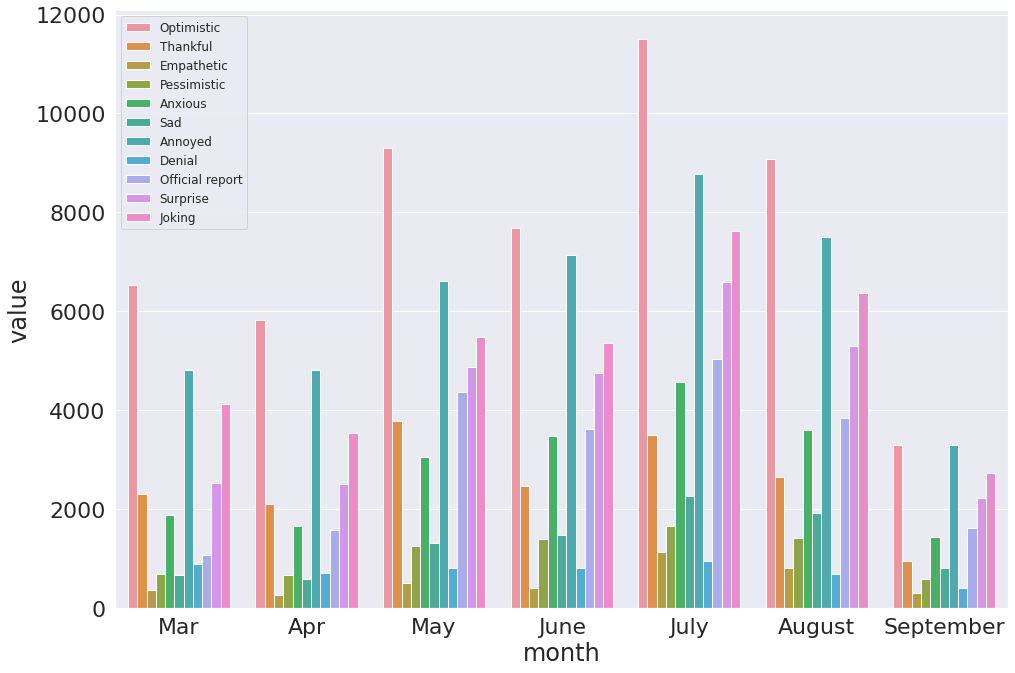

In [ ]:
plt.figure(figsize = (16, 11))
sns.set(font_scale = 2)
g = sns.barplot(x = 'month', y = 'value', hue = 'index', data = in_df.reset_index().melt(id_vars = 'index', var_name = 'month'))
g.legend(loc = 'upper left', fontsize = 12)

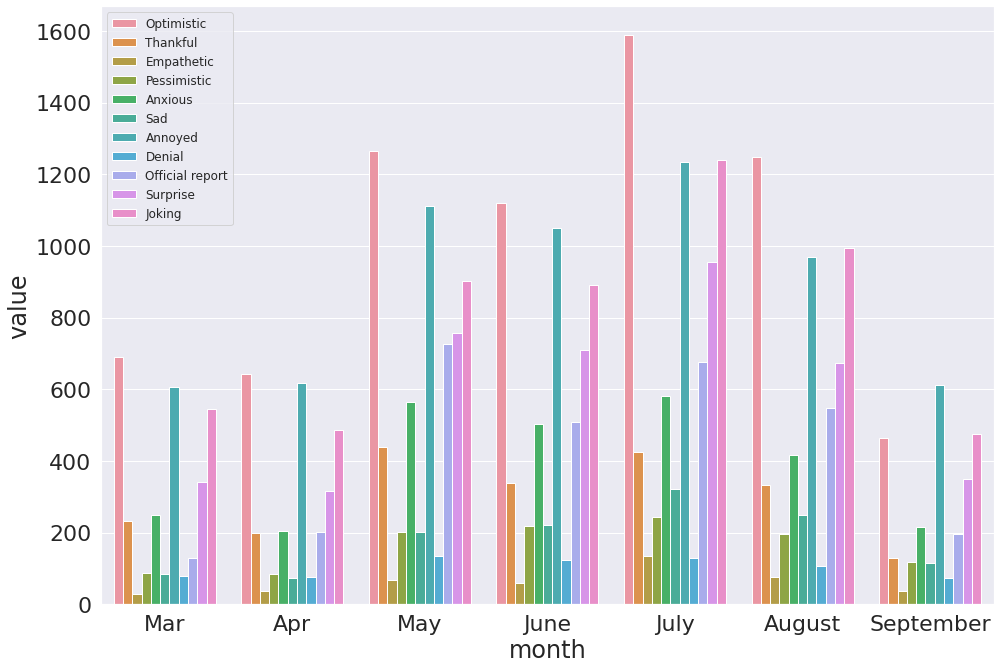

In [ ]:
plt.figure(figsize = (16, 11))
sns.set(font_scale = 2)
g = sns.barplot(x = 'month', y = 'value', hue = 'index', data = maha_df.reset_index().melt(id_vars = 'index', var_name = 'month'))
g.legend(loc = 'upper left', fontsize = 12)

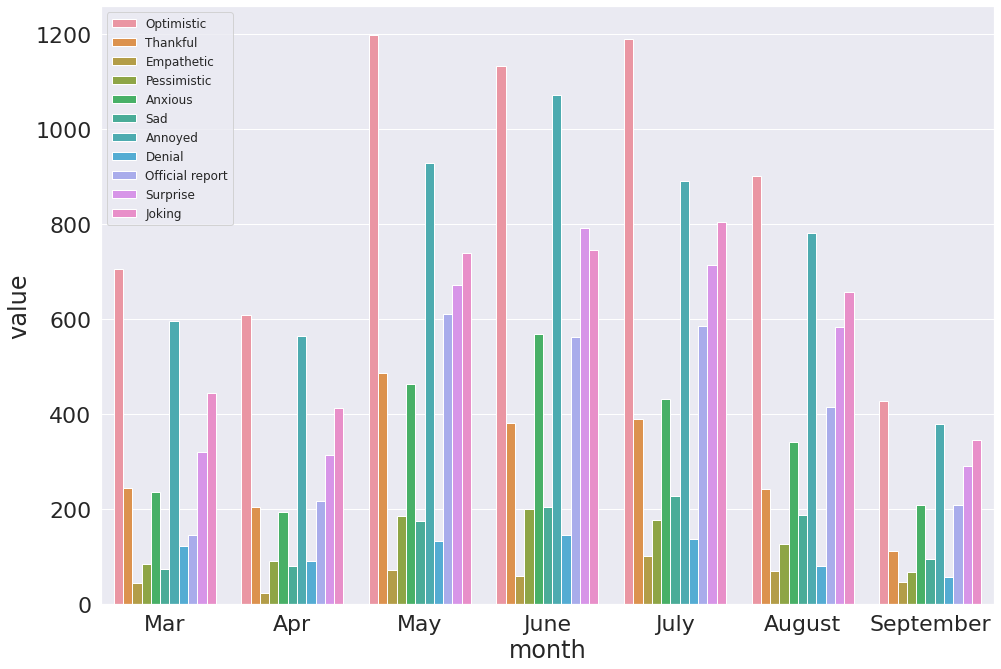

In [ ]:
plt.figure(figsize = (16, 11))
sns.set(font_scale = 2)
g = sns.barplot(x = 'month', y = 'value', hue = 'index', data = del_df.reset_index().melt(id_vars = 'index', var_name = 'month'))
g.legend(loc = 'upper left', fontsize = 12)

# **Visualisations based on LSTM model**

In [6]:
lstm_data_path = "/content/drive/MyDrive/Covid 19 India/final with target.csv"
lstm_data = pd.read_csv(lstm_data_path)
lstm_data = lstm_data.drop([33483, 62824])
lstm_data = lstm_data.reset_index().drop(['index'], axis = 1)
lstm_data

,tweet,sentiment_score,place,month,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Surprise,Joking
0,meditation and mindfulness tips for coping wit...,0.125000,"pune, india",mar,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,contribute to india fights corona gandhinagar...,0.000000,"gandhinagar, india",mar,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"sir, please send a team immediately to sa...",0.000000,"bidhan nagar, india",mar,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,#ssc_ufm_mat_karona#corona is slow poison #ufm...,0.033333,"maharashtra, india",mar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,mata di doston ise #corona ke tarah faila do ...,0.600000,"bokaro steel city, india",mar,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145548,wow good to see these kids interest in onli...,0.350000,lb nagar,sep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
145549,"83,812 new cases and 1054 deaths in last 24 ...",0.068182,"new delhi, india",sep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145550,unlocking the #lockdown - women’s rights &amp;...,-0.175000,"new delhi, india",sep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
145551,astrazeneca covid-19 vaccine trial in us on ho...,0.000000,"new delhi, india",sep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


**Bigrams, Trigrams and Tweets across months**

In [ ]:
from nltk.corpus import stopwords

def clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    StopWords = stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in StopWords]

words = clean(''.join(str(data['tweet'].tolist())))
words[:20]

['meditation',
 'mindfulness',
 'tip',
 'coping',
 'corona',
 'virus',
 'pandemicas',
 'people',
 'become',
 'anxious',
 'sel',
 'contribute',
 'india',
 'fight',
 'corona',
 'gandhinagar',
 'gujarat',
 'sir',
 'please',
 'send']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

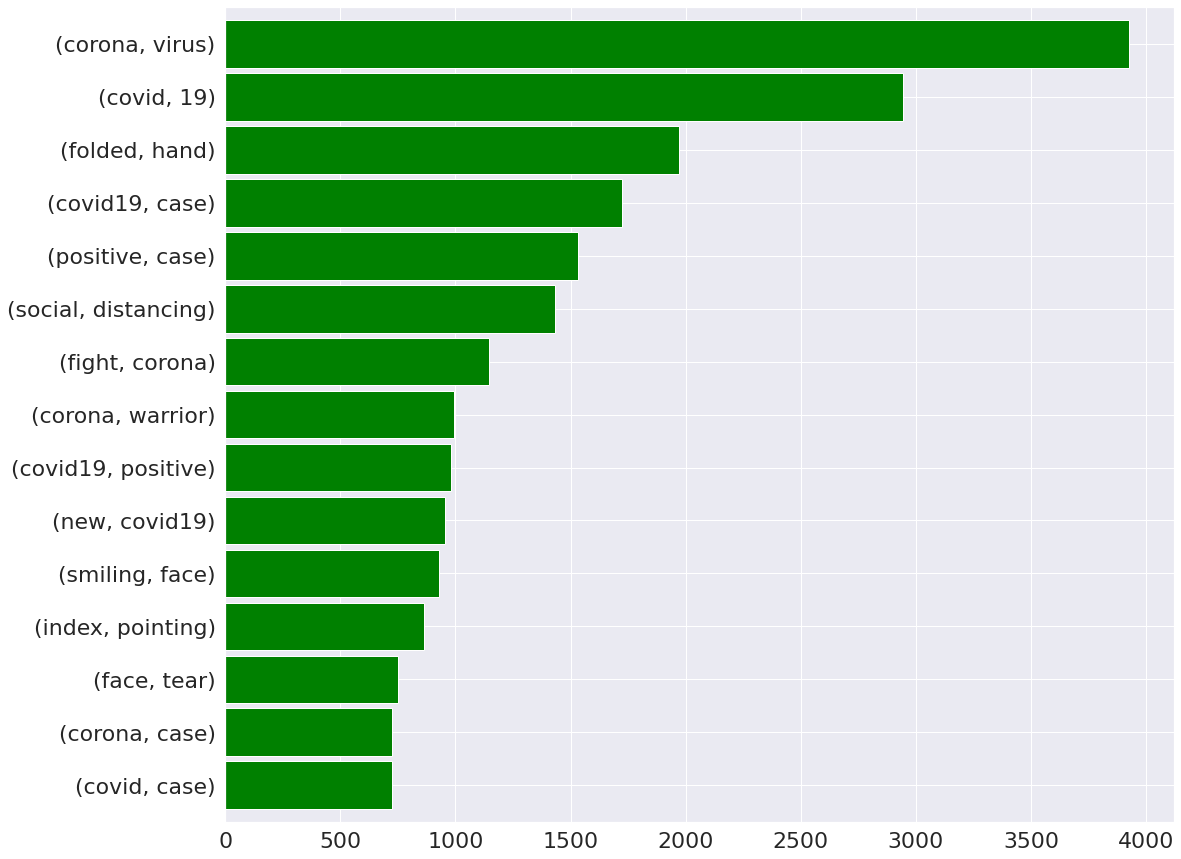

In [ ]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:15]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:15]

bigrams_series.sort_values().plot.barh(color = 'green', width = 0.9, figsize = (17, 15))
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

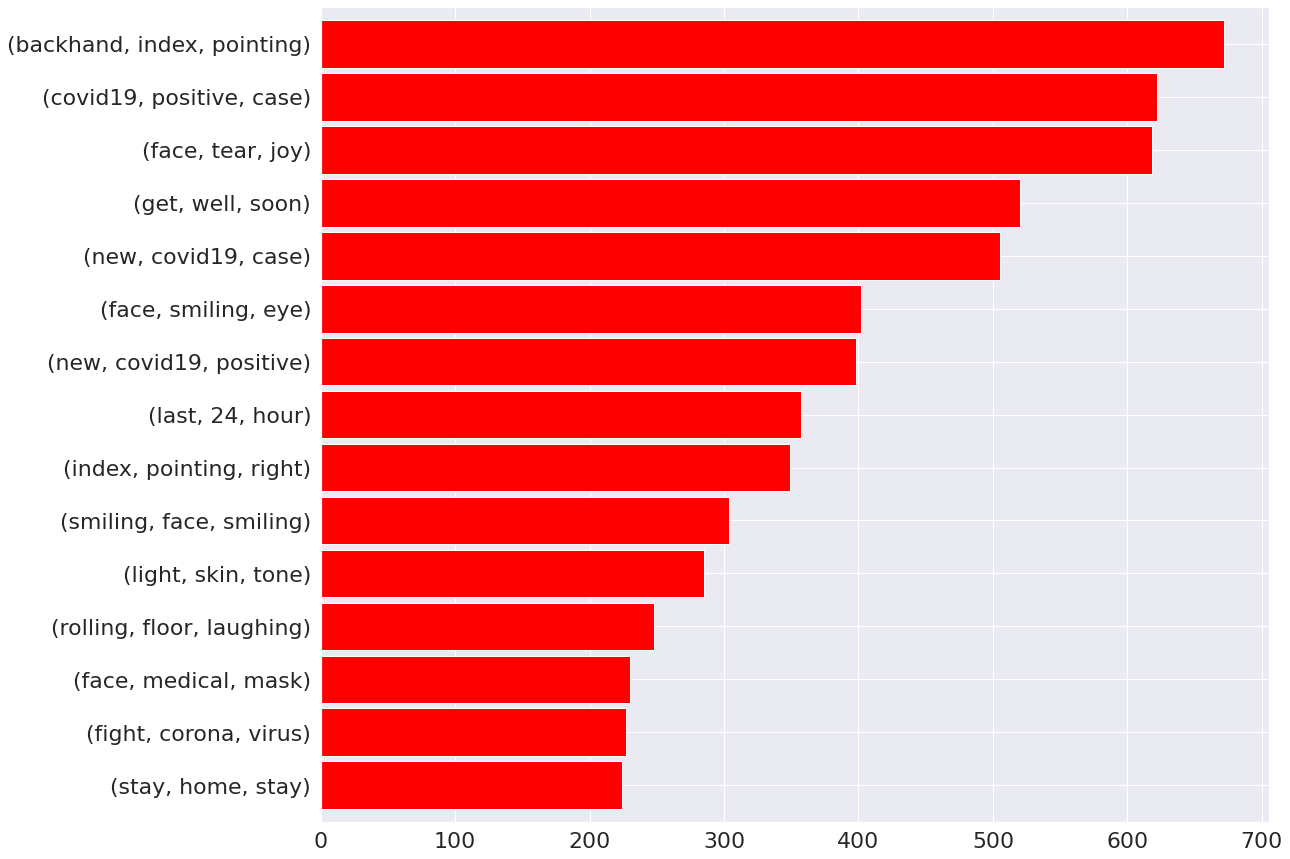

In [ ]:
trigrams_series.sort_values().plot.barh(color = 'red', width = 0.9, figsize = (17, 15))
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


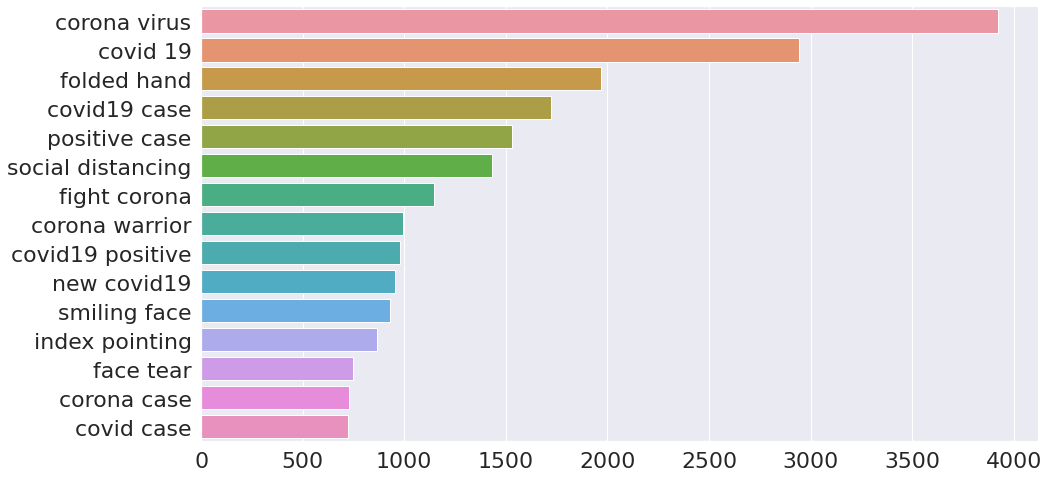

In [ ]:
bigrams = ['corona virus', 'covid 19', 'folded hand', 'covid19 case', 'positive case', 'social distancing', 'fight corona', 'corona warrior', 'covid19 positive',
           'new covid19', 'smiling face', 'index pointing', 'face tear', 'corona case', 'covid case']
sns.set(font_scale = 2)

plt.figure(figsize = (15, 8))
ax= sns.barplot(bigrams_series.values, bigrams, orient = 'h')
#plt.title("Distribution of Emotions", fontsize = 24)
#plt.xlabel('Number of Tweets', fontsize = 22)
#plt.ylabel('Emotion type', fontsize = 22)

#adding the text labels
rects = ax.patches
labels = bigrams_series.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = 'center', va = 'bottom', fontsize = 18)
plt.show()

In [ ]:
trigrams_series

(backhand, index, pointing)    672
(covid19, positive, case)      622
(face, tear, joy)              618
(get, well, soon)              520
(new, covid19, case)           505
(face, smiling, eye)           402
(new, covid19, positive)       398
(last, 24, hour)               357
(index, pointing, right)       349
(smiling, face, smiling)       304
(light, skin, tone)            285
(rolling, floor, laughing)     248
(face, medical, mask)          230
(fight, corona, virus)         227
(stay, home, stay)             224
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


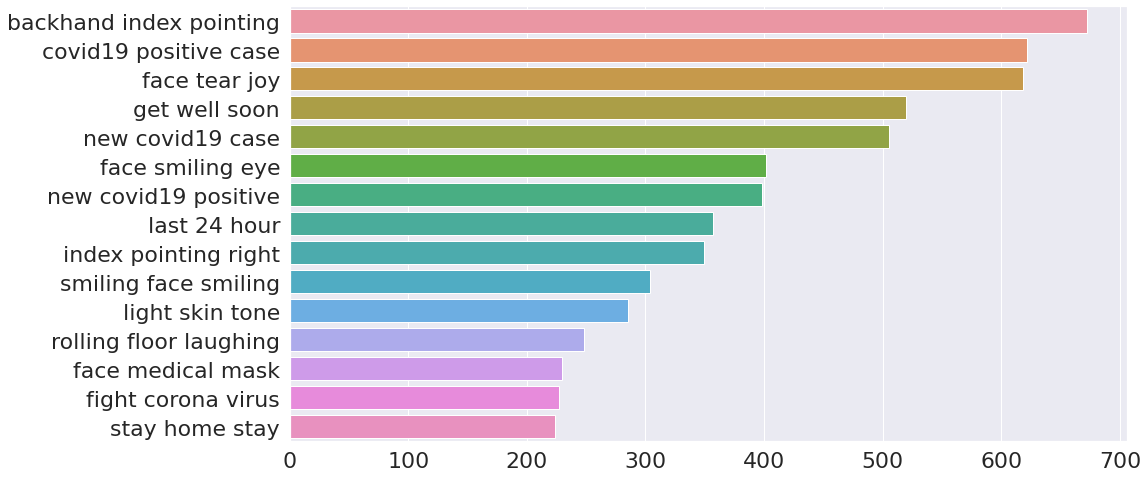

In [ ]:
trigrams = ['backhand index pointing', 'covid19 positive case', 'face tear joy', 'get well soon', 'new covid19 case', 'face smiling eye', 'new covid19 positive',
            'last 24 hour', 'index pointing right', 'smiling face smiling', 'light skin tone', 'rolling floor laughing', 'face medical mask', 'fight corona virus', 'stay home stay']
sns.set(font_scale = 2)

plt.figure(figsize = (15, 8))
ax = sns.barplot(trigrams_series.values, trigrams, orient = 'h')
#plt.title("Distribution of Emotions", fontsize = 24)
#plt.xlabel('Number of Tweets', fontsize = 22)
#plt.ylabel('Emotion type', fontsize = 22)

#adding the text labels
rects = ax.patches
labels = trigrams_series.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = 'center', va = 'bottom', fontsize = 18)
plt.show()

In [ ]:
print(data.iloc[145551])
print(data['tweet'].iloc[145551])

tweet              astrazeneca covid-19 vaccine trial in us on ho...
sentiment_score                                                    0
place                                               new delhi, india
month                                                            sep
Optimistic                                                         0
Thankful                                                           0
Empathetic                                                         0
Pessimistic                                                        0
Anxious                                                            0
Sad                                                                0
Annoyed                                                            0
Denial                                                             0
Official report                                                    1
Surprise                                                           1
Joking                            

In [ ]:
data.iloc[:, 4:] = data.iloc[:, 4:].astype(int)

In [ ]:
data['month'].value_counts()

jul    31745
aug    25784
may    24701
jun    22931
mar    15392
apr    14489
sep    10511
Name: month, dtype: int64

**Tweets and Cases plot**

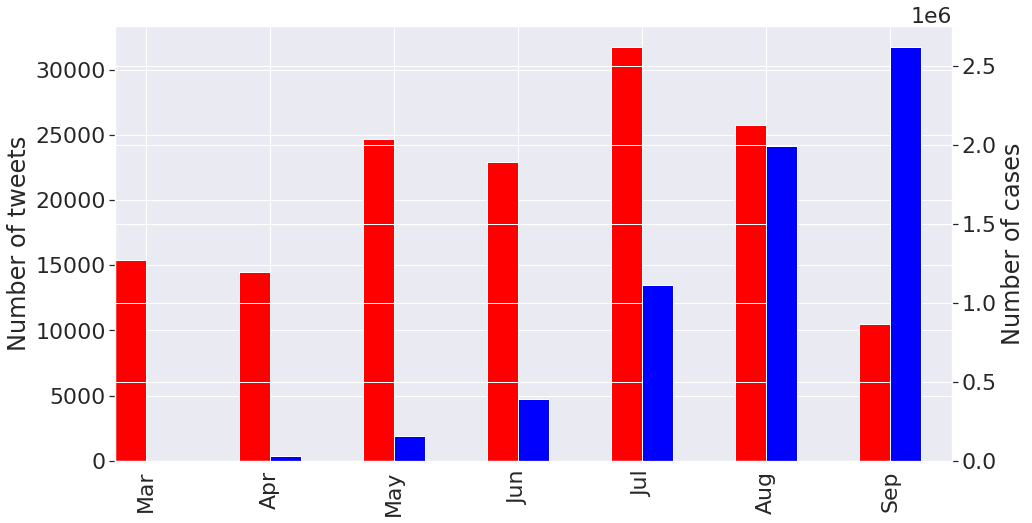

In [ ]:
months = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']

tweets = [15392, 14489, 24701, 22931, 31745, 25784, 10511]
tweets_mum = [1576, 1557, 3405, 3121, 3891, 3078, 1448]
tweets_del = [1776, 1676, 3418, 3422, 3351, 2614, 1336]

in_cases = [1632, 33232, 155781, 395143, 1111263, 1990888, 2622324]
mh_cases = [302, 10196, 57157, 107106, 247357, 370423, 591905]
dl_cases = [120, 3395, 16329, 67516, 48238, 39150, 104967]

plot_data = pd.DataFrame()
plot_data['months'] = months
plot_data['tweets'] = tweets
plot_data['tweets_mum'] = tweets_mum
plot_data['tweets_del'] = tweets_del
plot_data['in_cases'] = in_cases
plot_data['mh_cases'] = mh_cases
plot_data['dl_cases'] = dl_cases

fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.25

plot_data['tweets'].plot(kind = 'bar', color = 'red', ax = ax, width = width, position = 1)
plot_data['in_cases'].plot(kind = 'bar', color = 'blue', ax = ax2, width = width, position = 0)

ax.set_xticklabels(months)
ax.set_ylabel("Number of tweets")
ax2.set_ylabel("Number of cases")

plt.show()

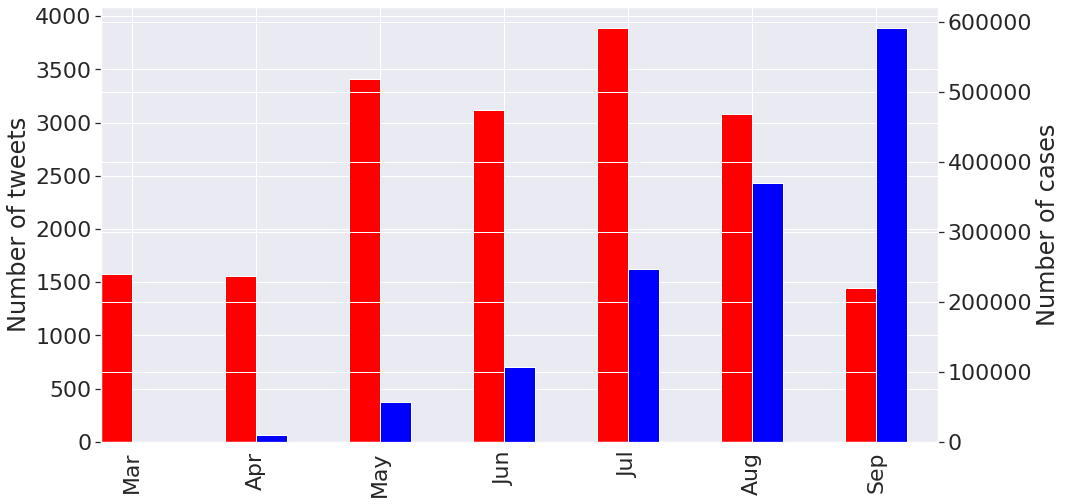

In [ ]:
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.25

plot_data['tweets_mum'].plot(kind = 'bar', color = 'red', ax = ax, width = width, position = 1)
plot_data['mh_cases'].plot(kind = 'bar', color = 'blue', ax = ax2, width = width, position = 0)

ax.set_xticklabels(months)
ax.set_ylabel("Number of tweets")
ax2.set_ylabel("Number of cases")

plt.show()

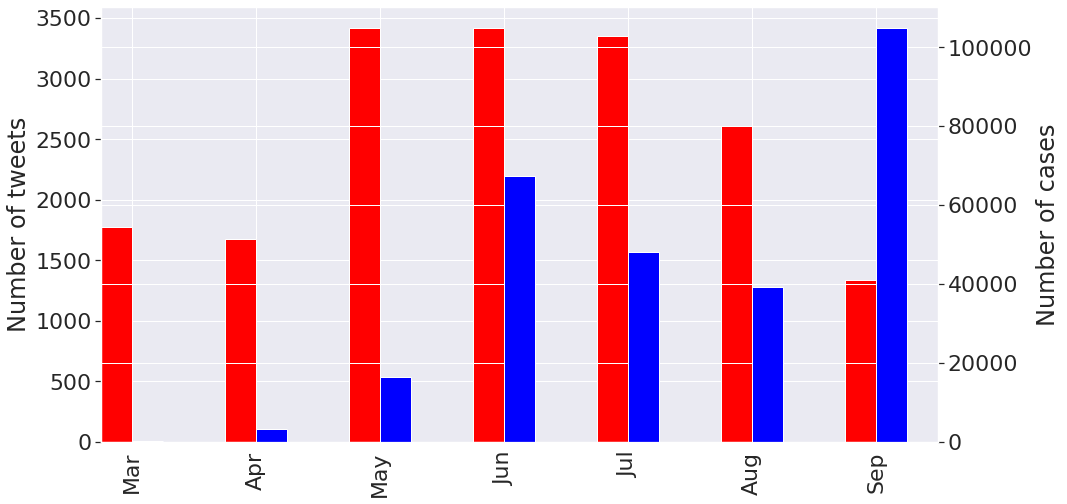

In [ ]:
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.25

plot_data['tweets_del'].plot(kind = 'bar', color = 'red', ax = ax, width = width, position = 1)
plot_data['dl_cases'].plot(kind = 'bar', color = 'blue', ax = ax2, width = width, position = 0)

ax.set_xticklabels(months)
ax.set_ylabel("Number of tweets")
ax2.set_ylabel("Number of cases")

plt.show()

In [ ]:
data = data.drop(['Denial'], axis = 1)
data.columns

Index(['tweet', 'sentiment_score', 'place', 'month', 'Optimistic', 'Thankful',
       'Empathetic', 'Pessimistic', 'Anxious', 'Sad', 'Annoyed',
       'Official report', 'Surprise', 'Joking'],
      dtype='object')

**Heat maps**

In [ ]:
emotions = list(data.columns[4:])
only_emotes = data[emotions]
only_emotes

,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Official report,Surprise,Joking
0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
145548,0,0,0,0,0,0,0,0,0,1
145549,0,0,0,0,0,0,0,1,0,0
145550,0,0,0,0,0,0,0,0,0,1
145551,0,0,0,0,0,0,0,1,1,0


In [ ]:
emote_array = np.zeros((10, 10))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Official report' : 7,
    'Surprise' : 8, 'Joking' : 9
}
for i in range(len(only_emotes)):
    l = only_emotes.iloc[i].tolist()
    for j in range(10):
        if l[j] == 1:
            emote_array[j][j] += 1
        for k in range(j+1, 10):
            if (l[j] == 1) and (l[k] == 1):
                emote_array[j][k] += int(1)
                emote_array[k][j] += int(1)

In [ ]:
emote_df = pd.DataFrame(emote_array, columns = emotions)
for col in emote_df:
    emote_df[col] = emote_df[col].astype(int)
emote_df

,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Official report,Surprise,Joking
0,34437,3933,1046,224,447,413,827,2374,3947,6951
1,3933,5339,403,174,284,347,407,474,400,709
2,1046,403,2806,156,253,382,234,169,203,498
3,224,174,156,2003,579,394,577,61,909,459
4,447,284,253,579,4826,893,684,506,1711,403
5,413,347,382,394,893,6245,1416,465,510,1040
6,827,407,234,577,684,1416,32221,311,3812,8787
7,2374,474,169,61,506,465,311,22193,4154,511
8,3947,400,203,909,1711,510,3812,4154,22142,2439
9,6951,709,498,459,403,1040,8787,511,2439,39241


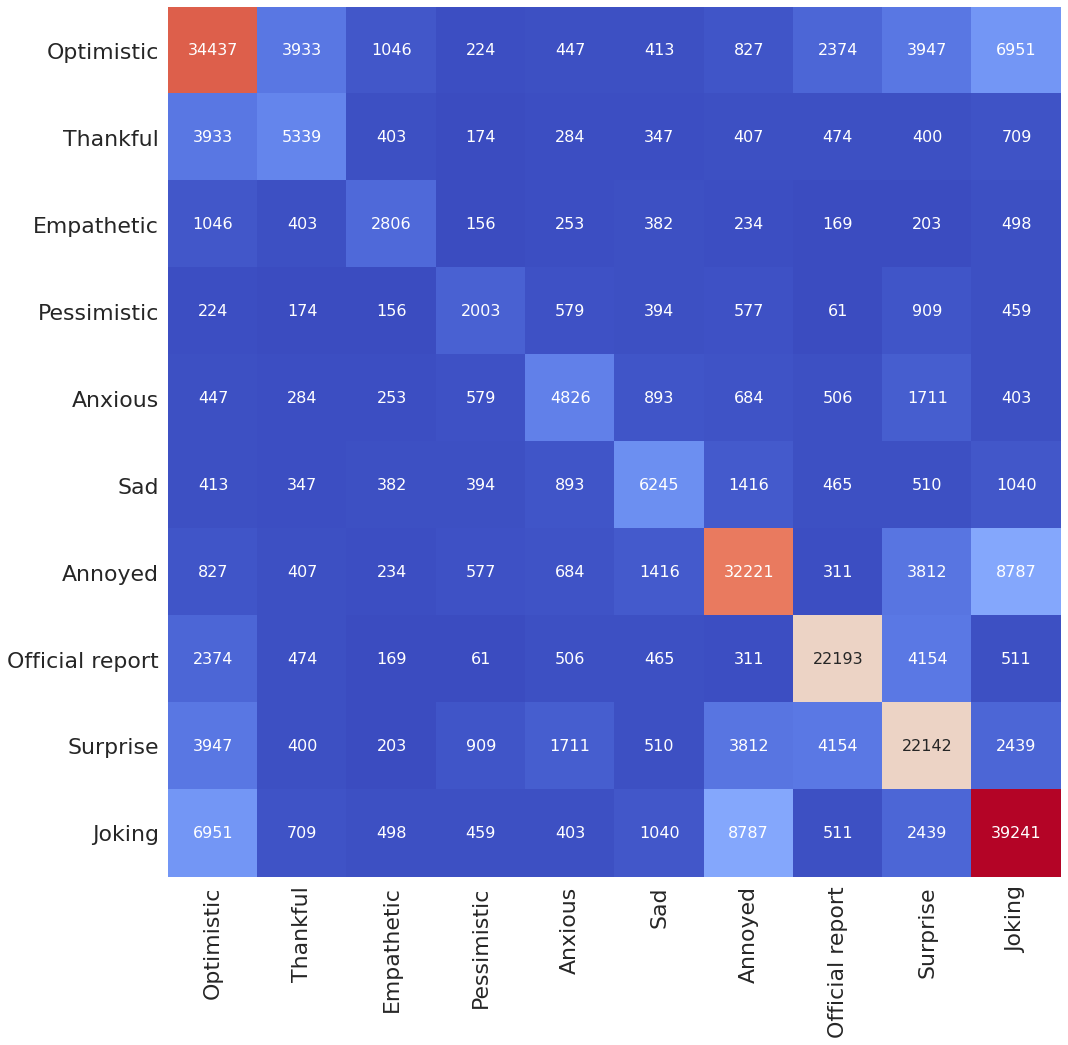

In [ ]:
fig = plt.figure(figsize = (16, 16))
sns.set(font_scale = 2)
sns.heatmap(emote_df, annot = True, cmap = 'coolwarm', xticklabels = emote_df.columns, yticklabels = emote_df.columns, 
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

**Calculating number of tweets having each emotion**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


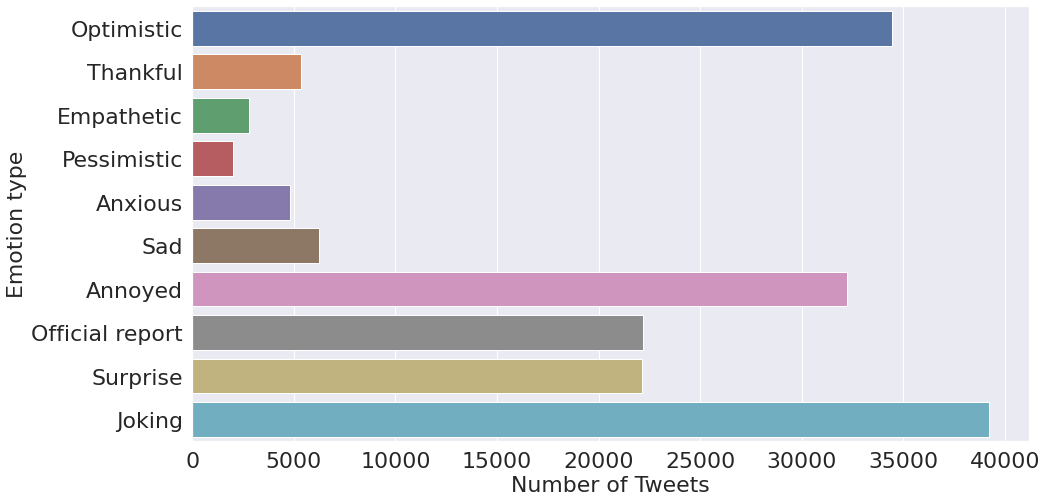

In [ ]:
categories = list(data.columns[4:].values)
sns.set(font_scale = 2)

plt.figure(figsize = (15, 8))
ax= sns.barplot(data.iloc[:, 4:].sum().values, categories, orient = 'h')
#plt.title("Distribution of Emotions", fontsize = 24)
plt.xlabel('Number of Tweets', fontsize = 22)
plt.ylabel('Emotion type', fontsize = 22)

#adding the text labels
rects = ax.patches
labels = data.iloc[:, 4:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = 'center', va = 'bottom', fontsize = 18)
plt.show()

Question? To keep denial or not?
Decided not to keep

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


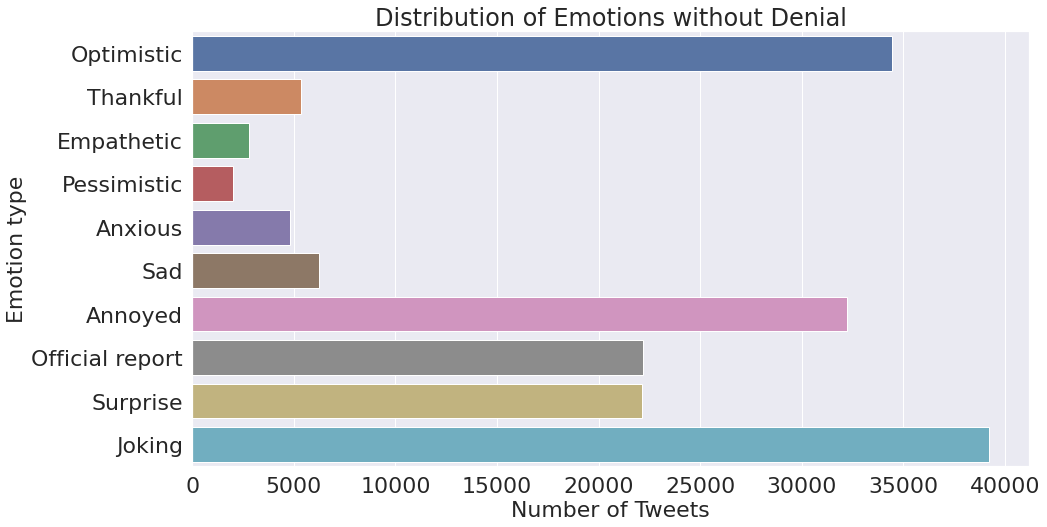

In [ ]:
categories = list(data.columns[4:].values)
sns.set(font_scale = 2)

plt.figure(figsize = (15, 8))
ax= sns.barplot(data.iloc[:, 4:].sum().values, categories, orient = 'h')
plt.title("Distribution of Emotions without Denial", fontsize = 24)
plt.xlabel('Number of Tweets', fontsize = 22)
plt.ylabel('Emotion type', fontsize = 22)

#adding the text labels
rects = ax.patches
labels = data.iloc[:, 4:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = 'center', va = 'bottom', fontsize = 18)
plt.show()

**Calculating number of tweets having multiple labels**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


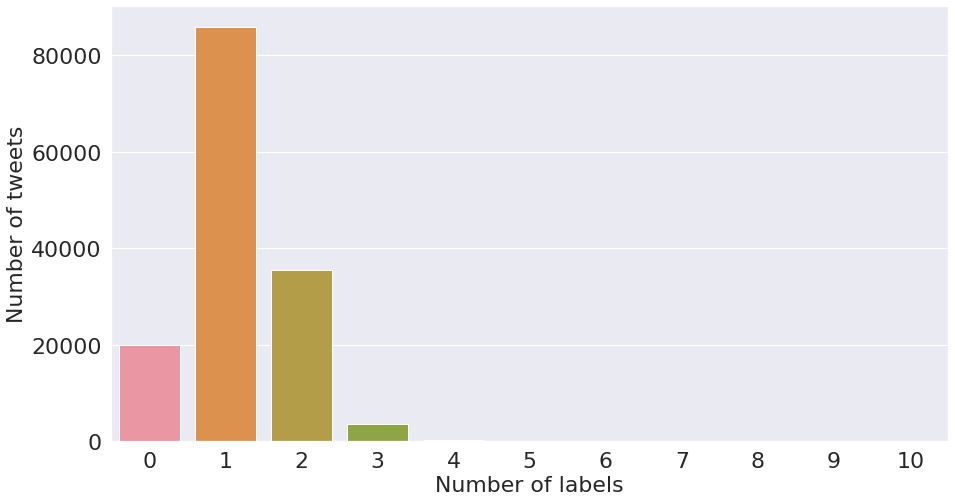

In [ ]:
data['n_emotions'] = data['Optimistic'] + data['Thankful'] + data['Empathetic'] + data['Pessimistic'] + data['Anxious'] + data['Sad'] + data['Annoyed'] + \
                     data['Official report'] + data['Surprise'] + data['Joking']
rowSums = data['n_emotions']
multiLabel_counts = rowSums.value_counts()

sns.set(font_scale = 2)
plt.figure(figsize = (15, 8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values, orient = 'v')

#plt.title("Tweets having multiple labels")
plt.ylabel('Number of tweets', fontsize = 22)
plt.xlabel('Number of labels', fontsize = 22)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

**Plots for Mumbai and Delhi**

In [7]:
maha_lstm = lstm_data[(lstm_data['place'] == "mumbai, india") | (lstm_data['place'] == 'mumbai') | (lstm_data['place'] == 'navi mumbai') | (lstm_data['place'] == 'navi mumbai, india') |
            (lstm_data['place'] == 'pune') | (lstm_data['place'] == 'pune, india') | (lstm_data['place'] == 'nagpur') | (lstm_data['place'] == 'nagpur, india')]
delhi_lstm = lstm_data[(lstm_data['place'] == "delhi, india") | (lstm_data['place'] == "new delhi, india") | (lstm_data['place'] == "delhi") | (lstm_data['place'] == 'new delhi')]

print(maha_lstm.shape, delhi_lstm.shape)

(20387, 15) (17593, 15)


pretty cool that we have approximately the same data points for both the cities

In [ ]:
emotions = list(data.columns[4:])
only_emotes_mum = mumbai[emotions]
only_emotes_del = delhi[emotions]

emote_array_mum = np.zeros((10, 10))
emote_array_del = np.zeros((10, 10))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Official report' : 7,
    'Surprise' : 8, 'Joking' : 9
}

for i in range(len(only_emotes_mum)):
    l = only_emotes_mum.iloc[i].tolist()
    for j in range(10):
        if l[j] == 1:
            emote_array_mum[j][j] += 1
        for k in range(j+1, 10):
            if (l[j] == 1) and (l[k] == 1):
                emote_array_mum[j][k] += int(1)
                emote_array_mum[k][j] += int(1)

for i in range(len(only_emotes_del)):
    l = only_emotes_del.iloc[i].tolist()
    for j in range(10):
        if l[j] == 1:
            emote_array_del[j][j] += 1
        for k in range(j+1, 10):
            if (l[j] == 1) and (l[k] == 1):
                emote_array_del[j][k] += int(1)
                emote_array_del[k][j] += int(1)

In [ ]:
emote_df_mum = pd.DataFrame(emote_array_mum, columns = emotions)
emote_df_del = pd.DataFrame(emote_array_del, columns = emotions)

for col in emote_df_mum:
    emote_df_mum[col] = emote_df_mum[col].astype(int)

for col in emote_df_del:
    emote_df_del[col] = emote_df_del[col].astype(int)

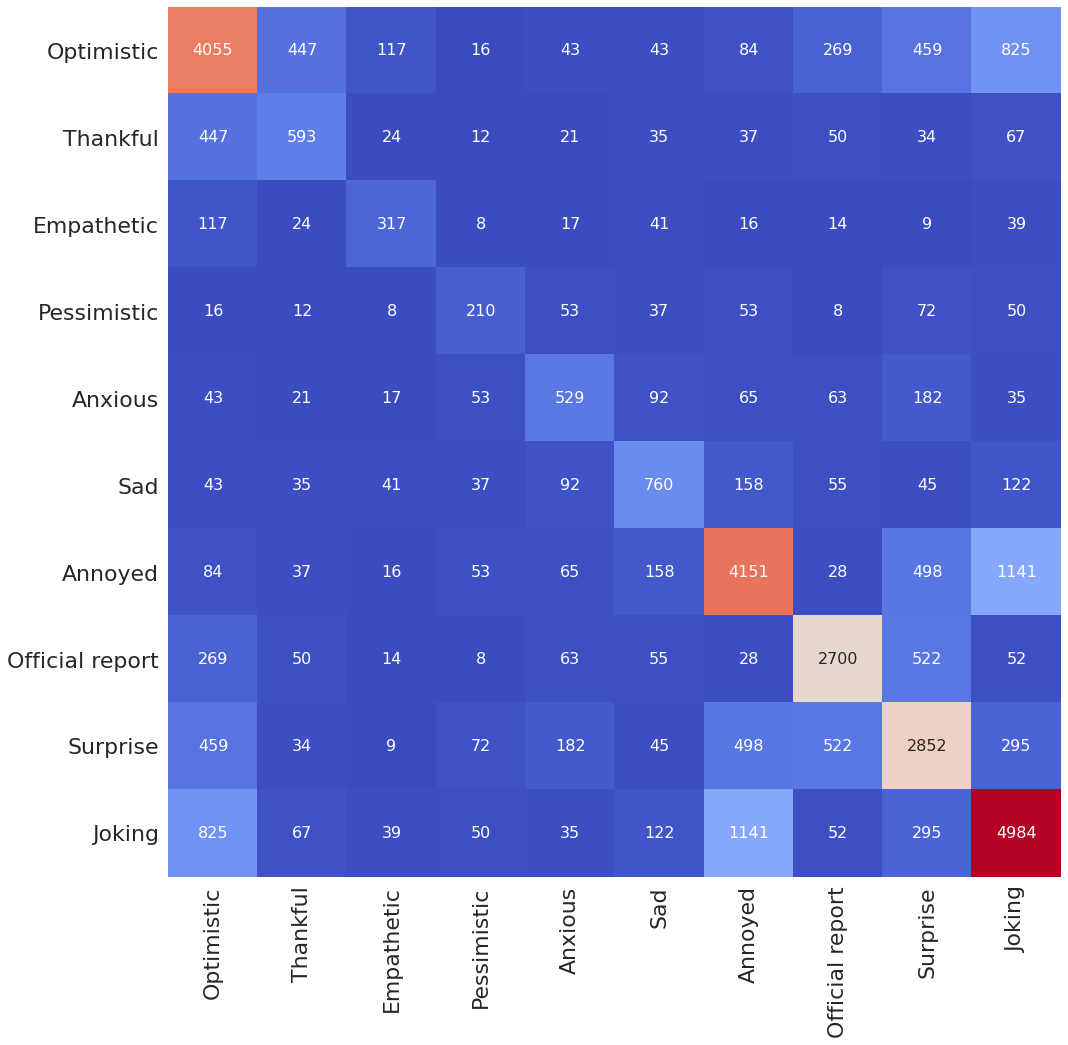

In [ ]:
fig = plt.figure(figsize = (16, 16))
sns.set(font_scale = 2)
sns.heatmap(emote_df_mum, annot = True, cmap = 'coolwarm', xticklabels = emote_df_mum.columns, yticklabels = emote_df_mum.columns, 
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

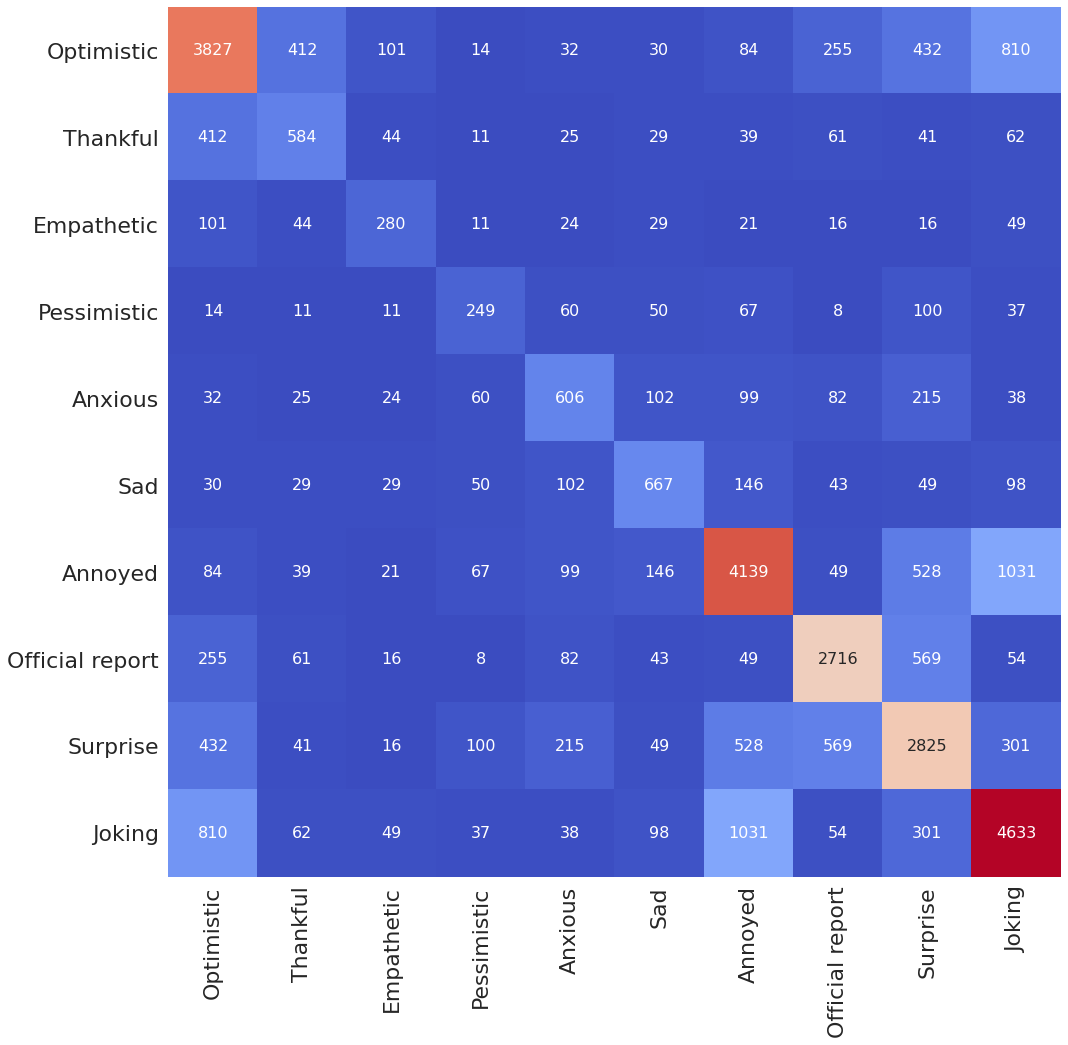

In [ ]:
fig = plt.figure(figsize = (16, 16))
sns.set(font_scale = 2)
sns.heatmap(emote_df_del, annot = True, cmap = 'coolwarm', xticklabels = emote_df_del.columns, yticklabels = emote_df_del.columns, 
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


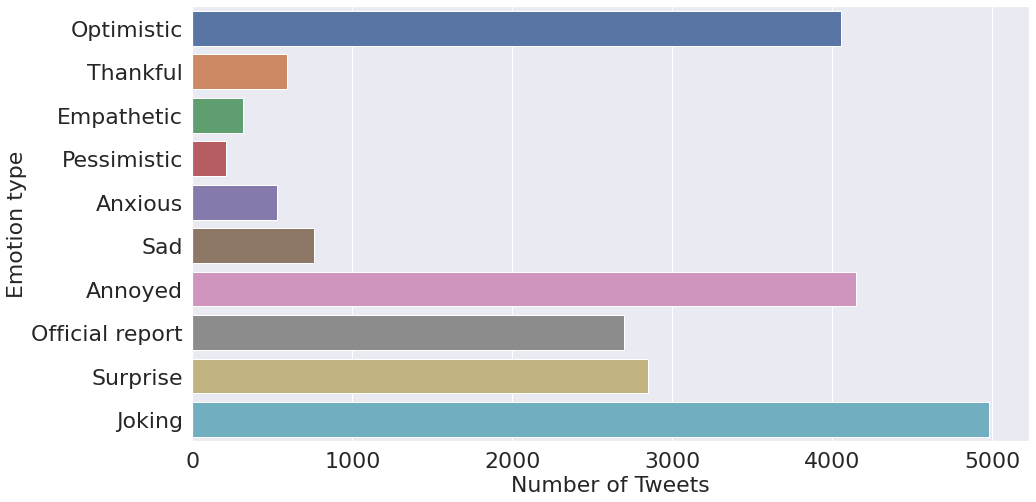

In [ ]:
categories = list(mumbai.columns[4:].values)
sns.set(font_scale = 2)

plt.figure(figsize = (15, 8))
ax= sns.barplot(mumbai.iloc[:, 4:].sum().values, categories, orient = 'h')
#plt.title("Distribution of Emotions", fontsize = 24)
plt.xlabel('Number of Tweets', fontsize = 22)
plt.ylabel('Emotion type', fontsize = 22)

#adding the text labels
rects = ax.patches
labels = mumbai.iloc[:, 4:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = 'center', va = 'bottom', fontsize = 18)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


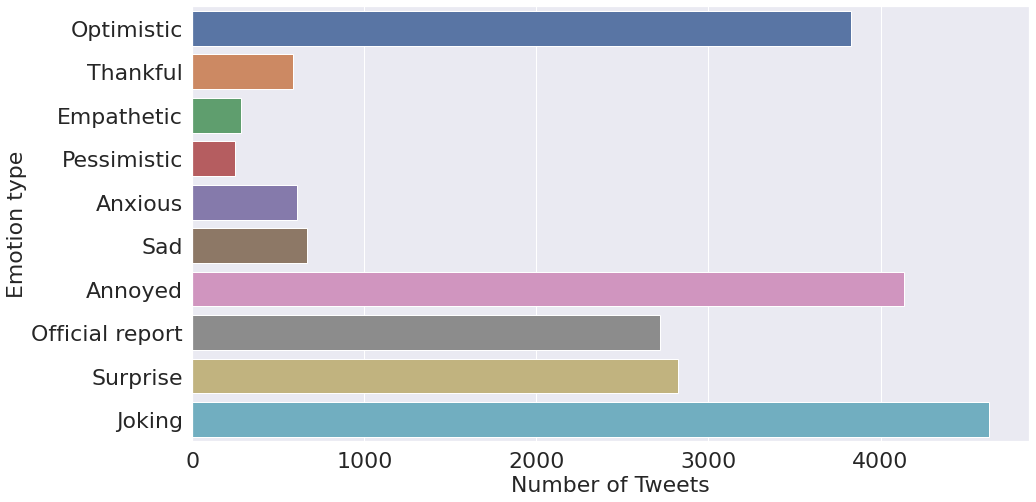

In [ ]:
categories = list(delhi.columns[4:].values)
sns.set(font_scale = 2)

plt.figure(figsize = (15, 8))
ax= sns.barplot(delhi.iloc[:, 4:].sum().values, categories, orient = 'h')
#plt.title("Distribution of Emotions", fontsize = 24)
plt.xlabel('Number of Tweets', fontsize = 22)
plt.ylabel('Emotion type', fontsize = 22)

#adding the text labels
rects = ax.patches
labels = delhi.iloc[:, 4:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = 'center', va = 'bottom', fontsize = 18)
plt.show()

**Monthwise visualisation of emotions**

In [ ]:
def get_lists(data):
    emotions = data.columns[4:]
    months = ["March", "April", "May", "June", "July", "August", "September"]
    march = [data[data['month'] == 'mar'][x].sum() for x in emotions]
    april = [data[data['month'] == 'apr'][x].sum() for x in emotions]
    may = [data[data['month'] == 'may'][x].sum() for x in emotions]
    june = [data[data['month'] == 'jun'][x].sum() for x in emotions]
    july = [data[data['month'] == 'jul'][x].sum() for x in emotions]
    august = [data[data['month'] == 'aug'][x].sum() for x in emotions]
    september = [data[data['month'] == 'sep'][x].sum() for x in emotions]

    return march, april, may, june, july, august, september

def monthwise(march, april, may, june, july, august, september):

    df = pd.DataFrame({'Mar' : {'Optimistic' : march[0],
                                'Thankful' : march[1],
                                'Empathetic' : march[2],
                                'Pessimistic' : march[3],
                                'Anxious' : march[4],
                                'Sad' : march[5],
                                'Annoyed' : march[6],
                                'Official report' : march[7],
                                'Surprise' : march[8],
                                'Joking' : march[9]},
                    
                    'Apr' : {'Optimistic' : april[0],
                                'Thankful' : april[1],
                                'Empathetic' : april[2],
                                'Pessimistic' : april[3],
                                'Anxious' : april[4],
                                'Sad' : april[5],
                                'Annoyed' : april[6],
                                'Official report' : april[7],
                                'Surprise' : april[8],
                                'Joking' : april[9]},
                    
                    'May' : {'Optimistic' : may[0],
                                'Thankful' : may[1],
                                'Empathetic' : may[2],
                                'Pessimistic' : may[3],
                                'Anxious' : may[4],
                                'Sad' : may[5],
                                'Annoyed' : may[6],
                                'Official report' : may[7],
                                'Surprise' : may[8],
                                'Joking' : may[9]},
                    
                    'June' : {'Optimistic' : june[0],
                                'Thankful' : june[1],
                                'Empathetic' : june[2],
                                'Pessimistic' : june[3],
                                'Anxious' : june[4],
                                'Sad' : june[5],
                                'Annoyed' : june[6],
                                'Official report' : june[7],
                                'Surprise' : june[8],
                                'Joking' : june[9]},
                                
                        'July' : {'Optimistic' : july[0],
                                'Thankful' : july[1],
                                'Empathetic' : july[2],
                                'Pessimistic' : july[3],
                                'Anxious' : july[4],
                                'Sad' : july[5],
                                'Annoyed' : july[6],
                                'Official report' : july[7],
                                'Surprise' : july[8],
                                'Joking' : july[9]},
                    
                    'August' : {'Optimistic' : august[0],
                                'Thankful' : august[1],
                                'Empathetic' : august[2],
                                'Pessimistic' : august[3],
                                'Anxious' : august[4],
                                'Sad' : august[5],
                                'Annoyed' : august[6],
                                'Official report' : august[7],
                                'Surprise' : august[8],
                                'Joking' : august[9]},
                    
                    'September' : {'Optimistic' : september[0],
                                'Thankful' : september[1],
                                'Empathetic' : september[2],
                                'Pessimistic' : september[3],
                                'Anxious' : september[4],
                                'Sad' : september[5],
                                'Annoyed' : september[6],
                                'Official report' : september[7],
                                'Surprise' : september[8],
                                'Joking' : september[9]}})
    return df

In [ ]:
mar_in, apr_in, may_in, jun_in, jul_in, aug_in, sep_in = get_lists(data)
in_df = monthwise(mar_in, apr_in, may_in, jun_in, jul_in, aug_in, sep_in)

mar_mum, apr_mum, may_mum, jun_mum, jul_mum, aug_mum, sep_mum = get_lists(mumbai)
mum_df = monthwise(mar_mum, apr_mum, may_mum, jun_mum, jul_mum, aug_mum, sep_mum)

mar_del, apr_del, may_del, jun_del, jul_del, aug_del, sep_del = get_lists(delhi)
del_df = monthwise(mar_del, apr_del, may_del, jun_del, jul_del, aug_del, sep_del)

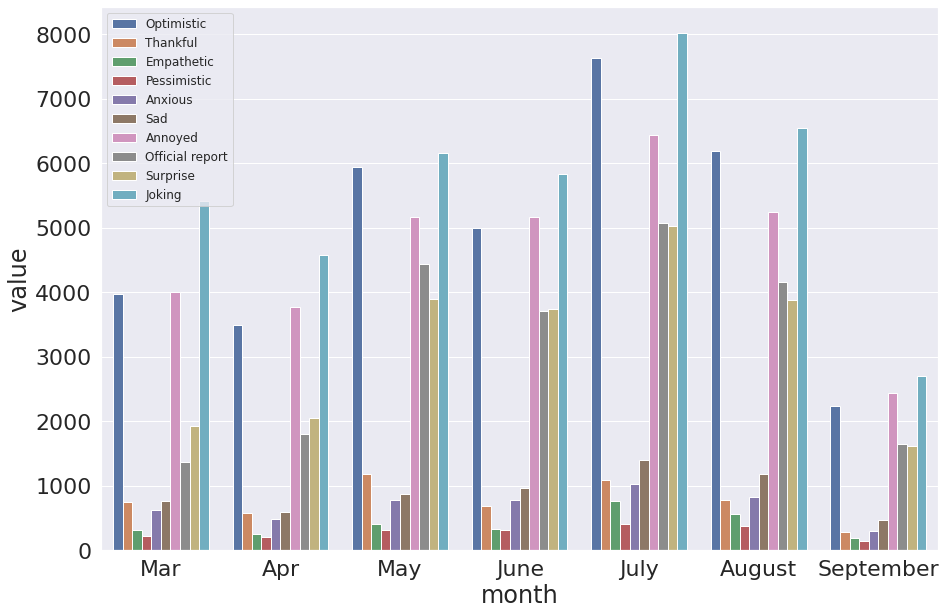

In [ ]:
plt.figure(figsize = (15, 10))
sns.set(font_scale = 2)
g = sns.barplot(x = 'month', y = 'value', hue = 'index', data = in_df.reset_index().melt(id_vars = 'index', var_name = 'month'))
g.legend(loc = 'upper left', fontsize = 12)

In [ ]:
plt.figure(figsize = (15, 10))
sns.set(font_scale = 2)
g = sns.barplot(x = 'month', y = 'value', hue = 'index', data = mum_df.reset_index().melt(id_vars = 'index', var_name = 'month'))
g.legend(loc = 'upper left', fontsize = 12)

In [ ]:
plt.figure(figsize = (15, 10))
sns.set(font_scale = 2)
g = sns.barplot(x = 'month', y = 'value', hue = 'index', data = del_df.reset_index().melt(id_vars = 'index', var_name = 'month'))
g.legend(loc = 'upper left', fontsize = 12)

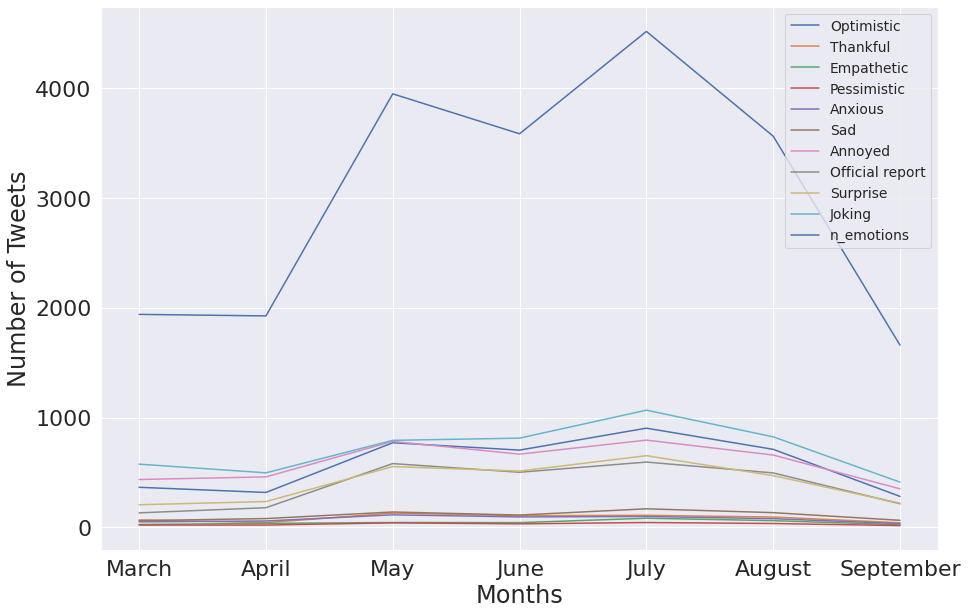

In [ ]:
#x axis -> months
#y axis -> emotions
emotions = mumbai.columns[4:]

input = []
months = ["March", "April", "May", "June", "July", "August", "September"]
march = [mumbai[mumbai['month'] == 'mar'][x].sum() for x in emotions]
april = [mumbai[mumbai['month'] == 'apr'][x].sum() for x in emotions]
may = [mumbai[mumbai['month'] == 'may'][x].sum() for x in emotions]
june = [mumbai[mumbai['month'] == 'jun'][x].sum() for x in emotions]
july = [mumbai[mumbai['month'] == 'jul'][x].sum() for x in emotions]
august = [mumbai[mumbai['month'] == 'aug'][x].sum() for x in emotions]
september = [mumbai[mumbai['month'] == 'sep'][x].sum() for x in emotions]

input.append(march)
input.append(april)
input.append(may)
input.append(june)
input.append(july)
input.append(august)
input.append(september)

plt.figure(figsize = (15, 10))
plt.plot(months, input)
plt.xlabel("Months")
plt.ylabel("Number of Tweets")
plt.legend(emotions, loc = 1, fontsize = 'xx-small')
#plt.title("Variation of emotions across the timeline in Mumbai")
plt.show()

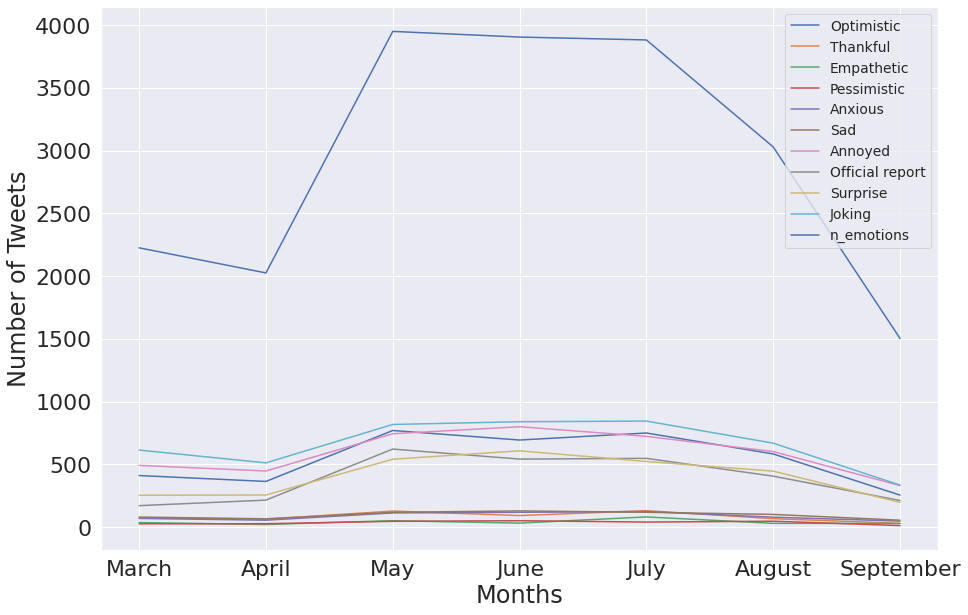

In [ ]:
#x axis -> months
#y axis -> emotions
emotions = delhi.columns[4:]

input = []
months = ["March", "April", "May", "June", "July", "August", "September"]
march = [delhi[delhi['month'] == 'mar'][x].sum() for x in emotions]
april = [delhi[delhi['month'] == 'apr'][x].sum() for x in emotions]
may = [delhi[delhi['month'] == 'may'][x].sum() for x in emotions]
june = [delhi[delhi['month'] == 'jun'][x].sum() for x in emotions]
july = [delhi[delhi['month'] == 'jul'][x].sum() for x in emotions]
august = [delhi[delhi['month'] == 'aug'][x].sum() for x in emotions]
september = [delhi[delhi['month'] == 'sep'][x].sum() for x in emotions]

input.append(march)
input.append(april)
input.append(may)
input.append(june)
input.append(july)
input.append(august)
input.append(september)

plt.figure(figsize = (15, 10))
plt.plot(months, input)
plt.xlabel("Months")
plt.ylabel("Number of Tweets")
plt.legend(emotions, loc = 1, fontsize = 'xx-small')
#plt.title("Variation of emotions across the timeline in Delhi")
plt.show()

In [ ]:
mumbai['month'].value_counts()

jul    3891
may    3405
jun    3121
aug    3078
mar    1576
apr    1557
sep    1448
Name: month, dtype: int64

In [ ]:
delhi['month'].value_counts()

jun    3422
may    3418
jul    3351
aug    2614
mar    1776
apr    1676
sep    1336
Name: month, dtype: int64

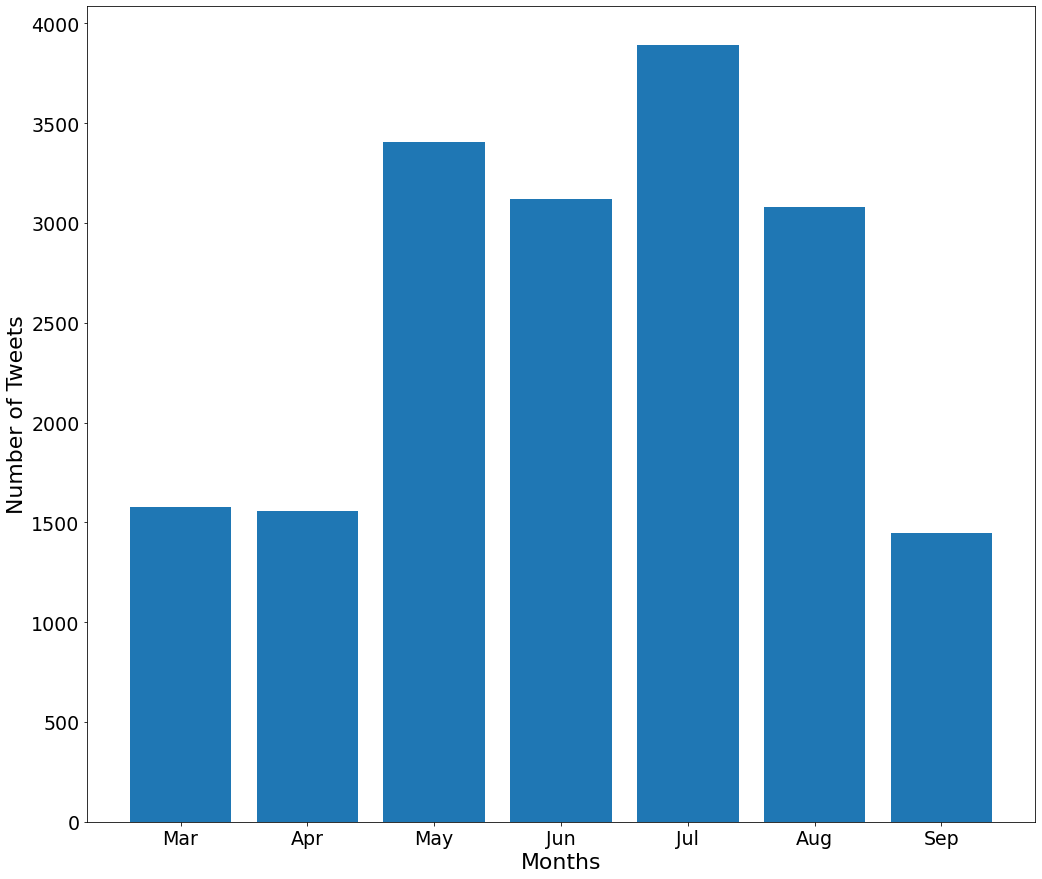

In [ ]:
#Number of tweets across months in Mumbai
months = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', "Sep"]
tweets = [1576, 1557, 3405, 3121, 3891, 3078, 1448]

fig, ax = plt.subplots(figsize = (17, 15))

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(19)

plt.bar(months, tweets)
plt.xlabel('Months', fontsize = 22)
plt.ylabel('Number of Tweets', fontsize = 22)
plt.show()

In [ ]:
#plot for number of cases per month in IN, MH, DL

months = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', "Sep"]
in_cases = [1632, 33232, 155781, 395143, 1111263, 1990888, 2622324]
mh_cases = [302, 10196, 57157, 107106, 247357, 370423, 591905]
dl_cases = [120, 3395, 16329, 67516, 48238, 39150, 104967]

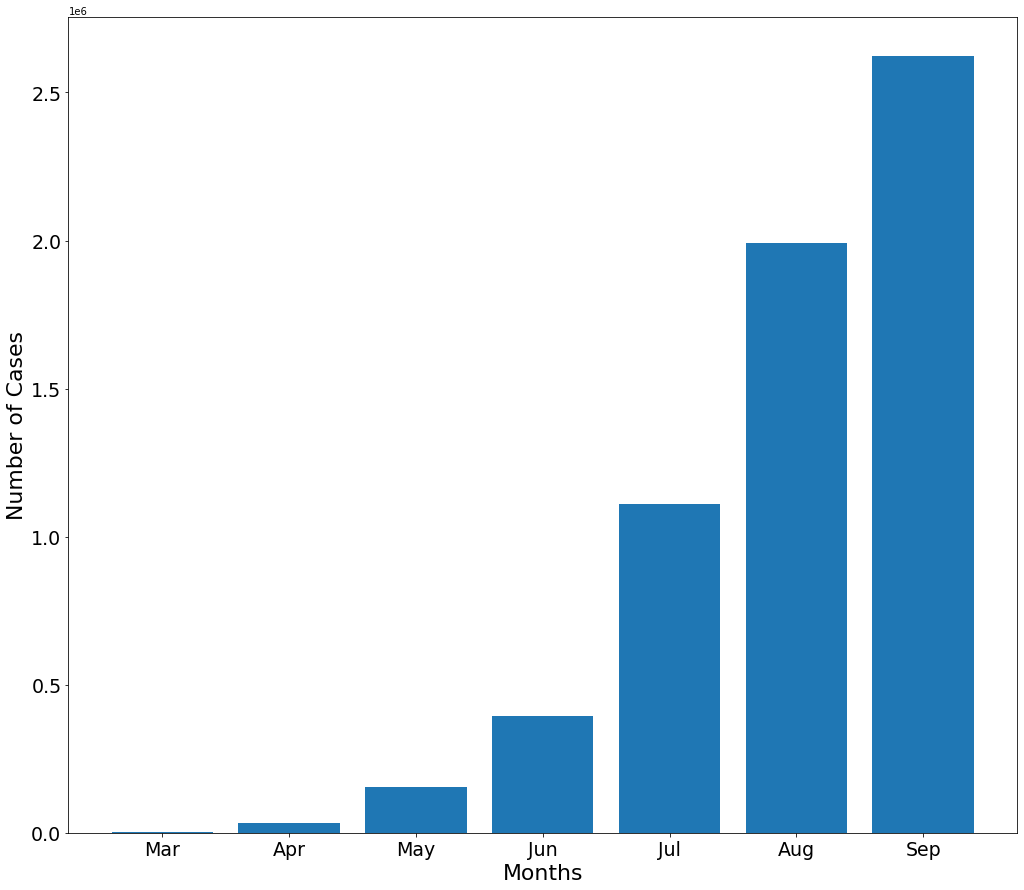

In [ ]:
#india
fig, ax = plt.subplots(figsize = (17, 15))

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(19)

plt.bar(months, in_cases)
plt.xlabel('Months', fontsize = 22)
plt.ylabel('Number of Cases', fontsize = 22)
plt.show()

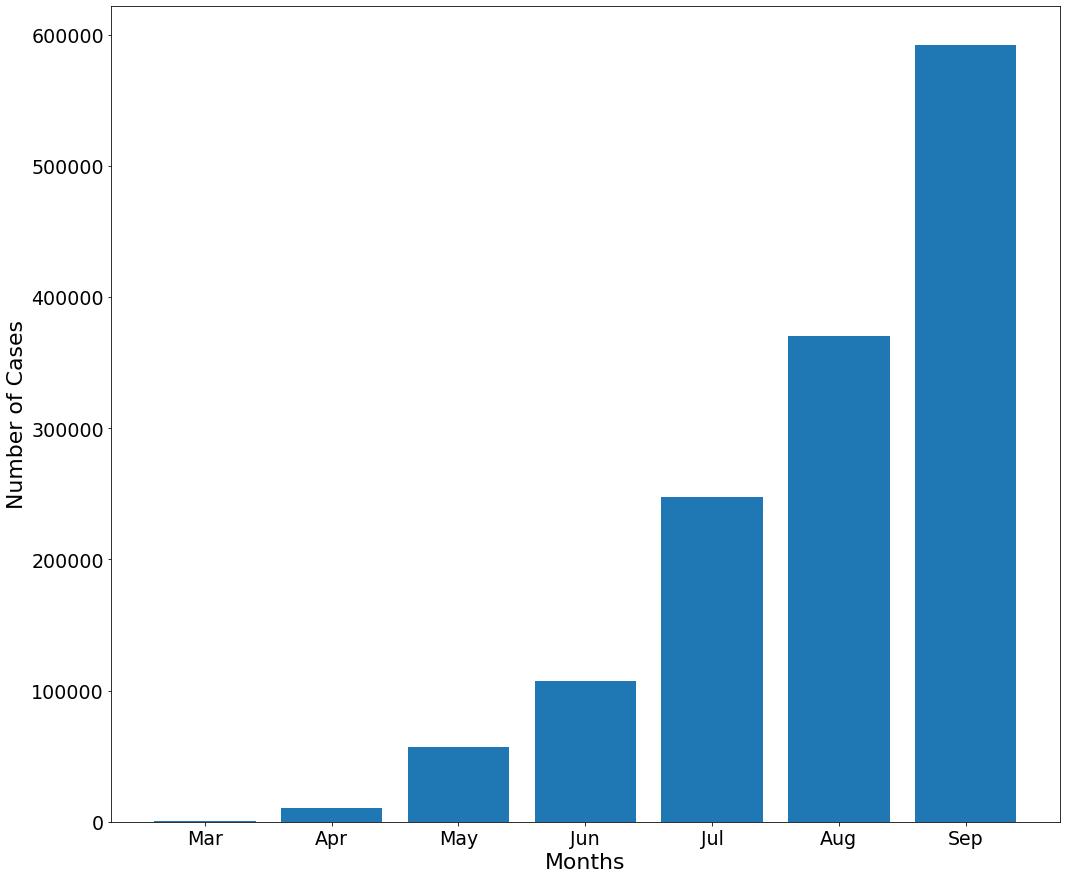

In [ ]:
#maharashtra
fig, ax = plt.subplots(figsize = (17, 15))

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(19)

plt.bar(months, mh_cases)
plt.xlabel('Months', fontsize = 22)
plt.ylabel('Number of Cases', fontsize = 22)
plt.show()

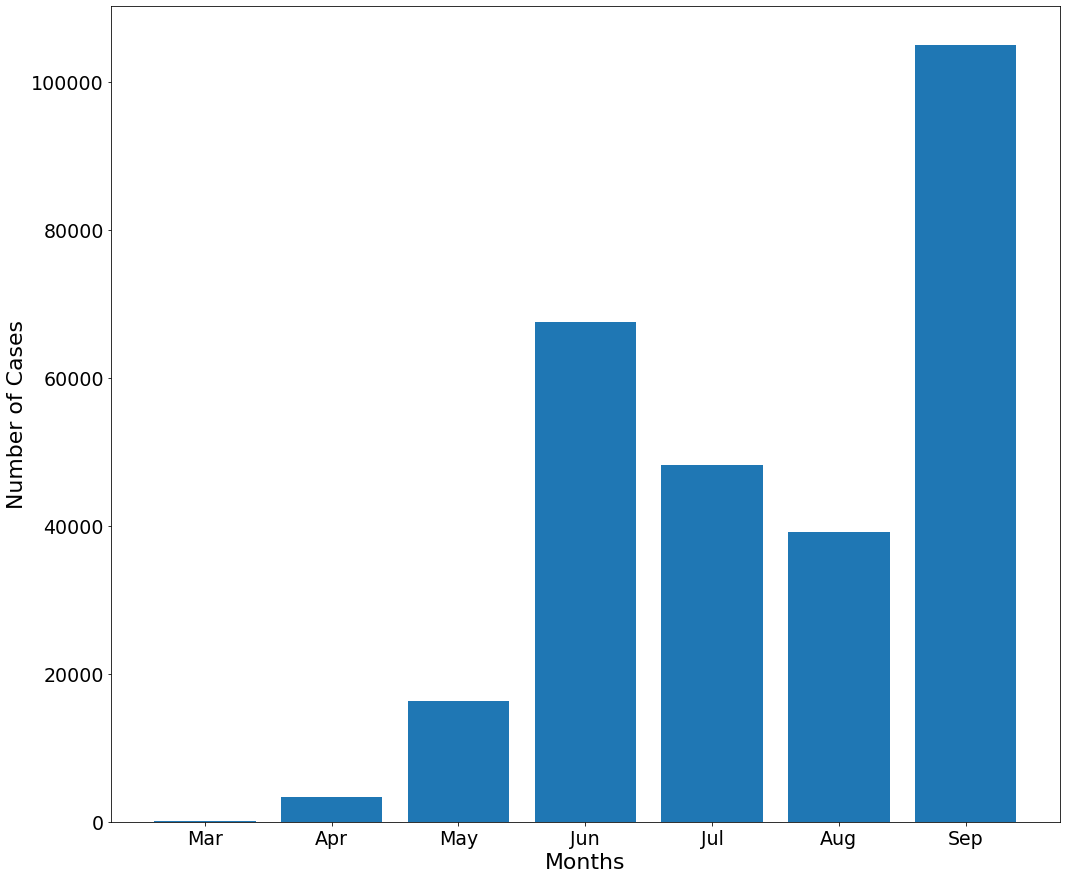

In [ ]:
#delhi
fig, ax = plt.subplots(figsize = (17, 15))

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(19)

plt.bar(months, dl_cases)
plt.xlabel('Months', fontsize = 22)
plt.ylabel('Number of Cases', fontsize = 22)
plt.show()

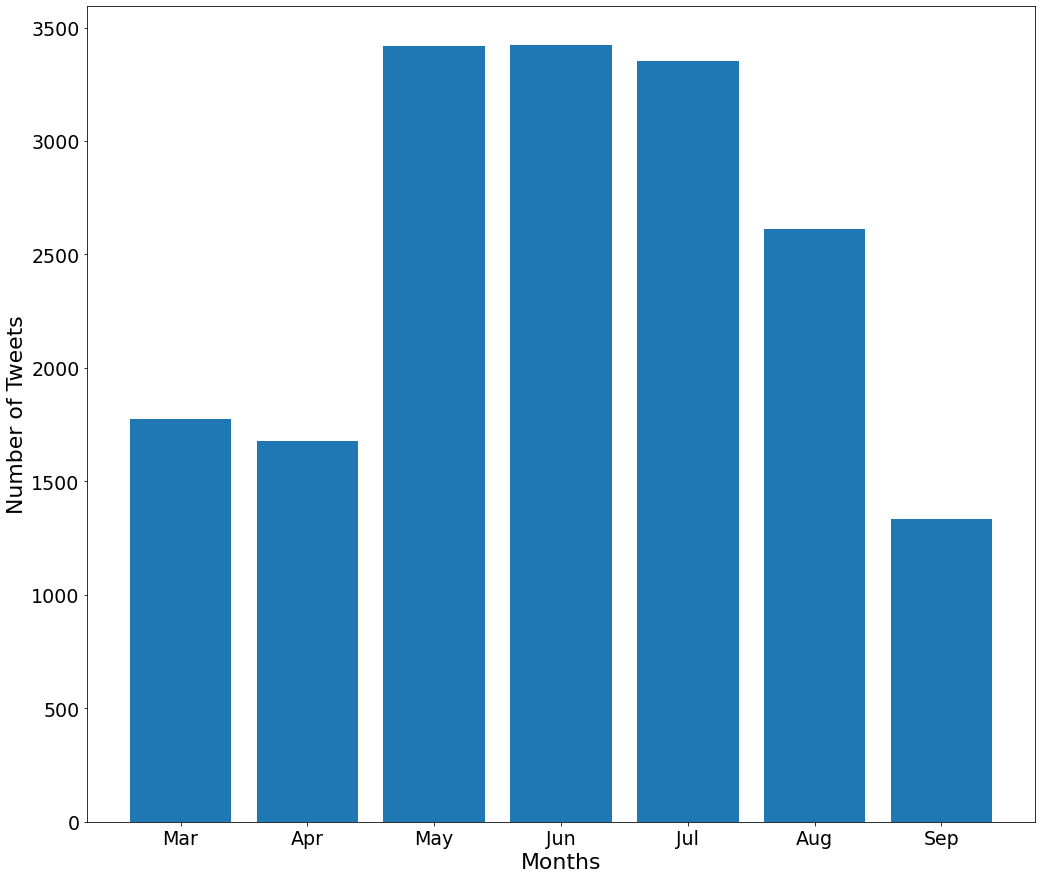

In [ ]:
#Number of tweets across months in Delhi
months = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', "Sep"]
tweets = [1776, 1676, 3418, 3422, 3351, 2614, 1336]

fig, ax = plt.subplots(figsize = (17, 15))

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(19)

plt.bar(months, tweets)
plt.xlabel('Months', fontsize = 22)
plt.ylabel('Number of Tweets', fontsize = 22)
plt.show()

**4 examples for 1,2 & 3 emotions**

**1 emotion**

In [ ]:
one_em = data[data['n_emotions'] == 1]
four = one_em.sample(n = 4)
four

,tweet,sentiment_score,place,month,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Official report,Surprise,Joking,n_emotions
103945,and cases will spike ....why ???,0.00,"bengaluru, india",jul,0,0,0,0,0,0,1,0,0,0,1
39011,watching ‘the last ship’ during this covid-19....,0.00,"mumbai, india",may,0,0,0,0,0,0,0,0,0,1,1
23464,the molana sadas' s trick was a plot of the co...,0.00,"jaipur, india",apr,0,0,0,0,0,0,1,0,0,0,1
69741,we understand that all the alternatives must h...,0.05,"guwahati, india",jun,0,0,0,0,0,0,0,0,1,0,1


In [ ]:
print(data['tweet'].iloc[103945], '\n', data[emotions].iloc[103945], '\n\n')
print(data['tweet'].iloc[39011], '\n', data[emotions].iloc[39011], '\n\n')
print(data['tweet'].iloc[23464], '\n', data[emotions].iloc[23464], '\n\n')
print(data['tweet'].iloc[69741], '\n', data[emotions].iloc[69741], '\n\n')

and cases will spike ....why ???  
 Optimistic         0
Thankful           0
Empathetic         0
Pessimistic        0
Anxious            0
Sad                0
Annoyed            1
Official report    0
Surprise           0
Joking             0
n_emotions         1
Name: 103945, dtype: int64 


watching ‘the last ship’ during this covid-19. reality and web series telling the same story. the world needs capta…  
 Optimistic         0
Thankful           0
Empathetic         0
Pessimistic        0
Anxious            0
Sad                0
Annoyed            0
Official report    0
Surprise           0
Joking             1
n_emotions         1
Name: 39011, dtype: int64 


the molana sadas' s trick was a plot of the corona division, the country was set to ruin.#arrest_shaitan_saad 
 Optimistic         0
Thankful           0
Empathetic         0
Pessimistic        0
Anxious            0
Sad                0
Annoyed            1
Official report    0
Surprise           0
Joking             0
n

**2 emotions**

In [ ]:
two_em = data[data['n_emotions'] == 2]
four = two_em.sample(n = 4)
four

,tweet,sentiment_score,place,month,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Official report,Surprise,Joking,n_emotions
16462,hats off,0.000000,"faridabad, india",apr,0,0,0,0,0,1,0,1,0,0,2
32025,pls allow intercity movement with state in roa...,0.145455,"mumbai, india",may,1,0,0,0,1,0,0,0,0,0,2
94799,#haryana government allows state government em...,0.000000,"mumbai, india",jul,0,0,0,0,0,0,1,1,0,0,2
96741,people are enjoying street food in curfew h...,-0.050000,waghodia road,jul,0,0,0,0,0,0,0,1,1,0,2


In [ ]:
print(data['tweet'].iloc[16462], '\n', data[emotions].iloc[16462], '\n\n')
print(data['tweet'].iloc[32025], '\n', data[emotions].iloc[32025], '\n\n')
print(data['tweet'].iloc[94799], '\n', data[emotions].iloc[94799], '\n\n')
print(data['tweet'].iloc[96741], '\n', data[emotions].iloc[96741], '\n\n')

hats off  
 Optimistic         0
Thankful           0
Empathetic         0
Pessimistic        0
Anxious            0
Sad                1
Annoyed            0
Official report    1
Surprise           0
Joking             0
n_emotions         2
Name: 16462, dtype: int64 


pls allow intercity movement with state in road in personal vehicles just for 1 day. so people would return to thei…  
 Optimistic         1
Thankful           0
Empathetic         0
Pessimistic        0
Anxious            1
Sad                0
Annoyed            0
Official report    0
Surprise           0
Joking             0
n_emotions         2
Name: 32025, dtype: int64 


#haryana government allows state government employees with physical disabilities of 50% or above and also those who…  
 Optimistic         0
Thankful           0
Empathetic         0
Pessimistic        0
Anxious            0
Sad                0
Annoyed            1
Official report    1
Surprise           0
Joking             0
n_emotions        